<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: center;
            border-radius: 8px;">
    <h1 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        PROYECTO: MODELO DE RIESGO
    </h1>
</div>

- María José Castillo Silva
- Juan David Bocanegra Vargas
- Luisa Fernanda Guevara Usuariaga

In [83]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes) y omitir warnings
import warnings
warnings.filterwarnings("ignore")

# Configuración de matplotlib para evitar warnings de fuentes
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

from IPython.display import HTML
display(HTML("<style>.container{ width:98% }</style>"))

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h2 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        1. Problema a Analizar
    </h2>
</div>

### ¿Cuál es la probabilidad de riesgo de default asociada a cada cliente, dadas sus diferentes características?.

La principal fuente de datos es Datacredito Experian, quienes envían información de los clientes actuales de la Entidad, incluyendo las siguientes variables: “Acierta Advance”, score de crédito del sector financiero, saldos, estados de productos crediticios y también información demografica como edad, sexo, entre otras.

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h2 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        2. Impacto del Problema
    </h2>
</div>

Actualmente en las áreas de riesgo de crédito en el sector bancario, se definen constantemente políticas que permiten soportar la toma de decisiones en la originación  de productos, que en la medida de lo posible, estén enmarcadas en la agilidad y precisión de la respuesta a clientes, y vayan en línea con el apetito financiero propuesto por la Junta Directiva.

## Instalación de Librerias

In [84]:
#!pip install eli5
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install yellowbrick
#!Pip install xgboost
#!pip install shap
#!pip install matplotlib
#!pip install scikit-learn
#!pip install imbalanced-learn

## Cargar Librerías

In [85]:
# %pip install -U scikit-learn==1.5.2 imbalanced-learn==0.12.3 yellowbrick==1.5

In [86]:
# ===============================
# Núcleo científico / utilidades
# ===============================
import warnings; warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Modelado y validación (scikit-learn)
# ===============================
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve,
    confusion_matrix
)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import brier_score_loss, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency


# ===============================
# Desbalanceo de clases (imbalanced-learn)
# ===============================
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ===============================
# Gradient Boosting (XGBoost)
# ===============================
from xgboost import XGBClassifier

# ===============================
# Estadística (SciPy y Statsmodels)
# ===============================
from scipy import stats
from scipy.stats import shapiro, normaltest, ttest_ind, mannwhitneyu
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

# ===============================
# Otros apoyos
# ===============================
from collections import Counter

# ===============================
# Opcionales de interpretación/visual
# ===============================
import shap
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, ClassificationReport
import eli5

# ===============================
# Estilo de gráficos
# ===============================
plt.style.use("ggplot")


## Importar Datos

In [87]:
datos = pd.read_csv('data/base_modelo_40k.csv', sep=',')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   40000 non-null  int64  
 1   CLIENTE_MORA         40000 non-null  int64  
 2   SEXO                 40000 non-null  object 
 3   EDAD                 40000 non-null  int64  
 4   INGRESO              40000 non-null  float64
 5   SCORE_DATACREDITO    40000 non-null  int64  
 6   CRED_REESTRUCTURADO  40000 non-null  int64  
 7   ANT_SF               40000 non-null  float64
 8   SALDO_SF             40000 non-null  float64
 9   TIENE_HIPOTECA       40000 non-null  int64  
 10  ULTIMAPERTURA        40000 non-null  int64  
 11  SALDO_FIJO           40000 non-null  float64
 12  SALDO_ROT            40000 non-null  float64
 13  ESTADO_MORA_FIN      40000 non-null  float64
 14  ESTADO_MORA_REAL     40000 non-null  float64
dtypes: float64(7), int64(7), object(1)
m

In [88]:
datos.head()

,ID,CLIENTE_MORA,SEXO,EDAD,INGRESO,SCORE_DATACREDITO,CRED_REESTRUCTURADO,ANT_SF,SALDO_SF,TIENE_HIPOTECA,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
0,245411,0,F,51,5.373539,675,0,6.83,133.124423,0,35,86.191899,68.093088,0.0,0.0
1,278521,0,M,32,20.009334,812,0,7.83,282.607212,0,18,68.242921,19.081655,0.0,0.0
2,58481,0,M,58,5.537541,812,0,6.17,10.650218,0,3,26.764786,44.264709,0.0,0.0
3,183771,0,F,40,5.838028,840,0,7.00,87.428428,1,7,32.291321,29.558226,0.0,0.0
4,310611,0,M,63,2.192562,625,0,0.00,0.000000,0,-1,0.000000,0.000000,0.0,0.0


In [89]:
print(datos.shape)

(40000, 15)


* Inicialmente se contemplaron 40 variables en estudio, mixtas entre categóricas y numéricas

In [90]:
datos['SEXO']=datos['SEXO'].replace({'M':0,'F':1}).astype('object')
datos['CRED_REESTRUCTURADO']=datos['CRED_REESTRUCTURADO'].astype('object')
datos['TIENE_HIPOTECA']=datos['TIENE_HIPOTECA'].astype('object')
datos['CLIENTE_MORA']=datos['CLIENTE_MORA'].astype('object')

In [91]:
### Conteo valores nulos
datos.isnull().sum()

ID                     0
CLIENTE_MORA           0
SEXO                   0
EDAD                   0
INGRESO                0
SCORE_DATACREDITO      0
CRED_REESTRUCTURADO    0
ANT_SF                 0
SALDO_SF               0
TIENE_HIPOTECA         0
ULTIMAPERTURA          0
SALDO_FIJO             0
SALDO_ROT              0
ESTADO_MORA_FIN        0
ESTADO_MORA_REAL       0
dtype: int64

* Por criterio experto, se consideran no necesarias las variables asociadas a la identificación del cliente, como el tipo de Id, el número de identificación y la fecha de evaluación; también se elimina la variable "Acierta_plus" ya que existe la variable "Advance".

In [92]:
#ELIMINAR COLUMNAS NO NECESARIAS
datos=datos.drop(labels='ID',axis=1)
datos

,CLIENTE_MORA,SEXO,EDAD,INGRESO,SCORE_DATACREDITO,CRED_REESTRUCTURADO,ANT_SF,SALDO_SF,TIENE_HIPOTECA,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
0,0,1,51,5.373539,675,0,6.83,133.124423,0,35,86.191899,68.093088,0.0,0.0
1,0,0,32,20.009334,812,0,7.83,282.607212,0,18,68.242921,19.081655,0.0,0.0
2,0,0,58,5.537541,812,0,6.17,10.650218,0,3,26.764786,44.264709,0.0,0.0
3,0,1,40,5.838028,840,0,7.00,87.428428,1,7,32.291321,29.558226,0.0,0.0
4,0,0,63,2.192562,625,0,0.00,0.000000,0,-1,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1,60,5.855639,753,0,7.75,46.270552,0,5,91.765247,58.386919,0.0,0.0
39996,0,1,57,2.975149,725,0,6.08,6.774709,0,56,73.974337,68.846599,0.0,0.0
39997,0,0,38,3.473759,753,0,12.00,3.549705,0,27,51.626281,21.191923,0.0,0.0
39998,1,0,54,7.497859,625,0,22.00,52.590679,0,9,73.950412,79.353979,0.0,0.0


In [93]:
### Dimensión base de datos
print(datos.shape)

(40000, 14)


<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h2 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        3. EDA
    </h2>
</div>

El objetivo de este EDA es identificar variables con capacidad discriminante entre clientes en mora y al día, evaluar su distribución, posibles sesgos y relaciones, y preparar la base para el modelado supervisado.

In [94]:
def info_frecuencia(df, threshold=0.05):
    for columna in df.columns:
        if df[columna].dtype == 'object':  # Verificar si la columna es categórica
            df_copy = df.copy()

            # Calcular las proporciones de cada categoría
            value_counts = df_copy[columna].value_counts() / len(df_copy)

            # Imprimir las frecuencias antes de la agrupacion
            print(f"Proporciones de cada categoría antes de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            # Encontrar las categorías que representan menos del threshold
            categorias_a_agrupar = value_counts[value_counts < threshold].index

            # Reemplazar las categorías con "Otros" en la copia
            df_copy[columna] = df_copy[columna].apply(lambda x: "Otros" if x in categorias_a_agrupar else x)

            # Mostrar las proporciones en la copia del DataFrame
            #print(f"Proporciones de cada categoría después de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            plt.figure(figsize=(4, 1))
            sns.set_context("paper", font_scale=1)
            sns.catplot(data=df_copy, x=columna, kind="count", palette="ch:.25", height=4, aspect=2)
            plt.title(f'Frecuencias de {columna}')
            plt.tick_params(left=False)
            plt.show()

Proporciones de cada categoría antes de agrupar 'Otros' en SEXO:
 SEXO
0    0.51025
1    0.48975
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

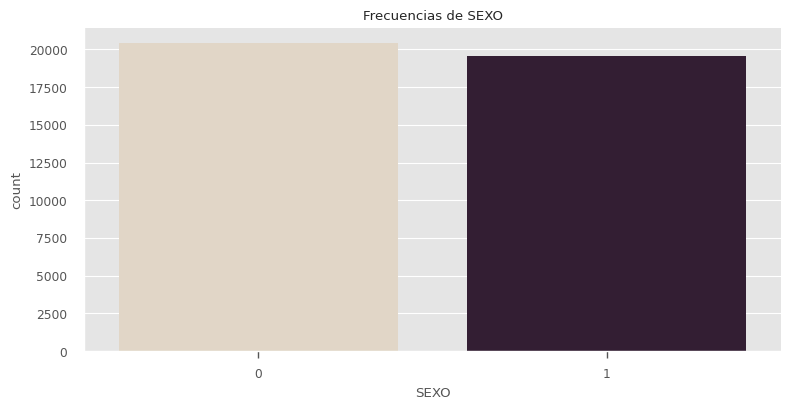

Proporciones de cada categoría antes de agrupar 'Otros' en CRED_REESTRUCTURADO:
 CRED_REESTRUCTURADO
0    0.9932
1    0.0068
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

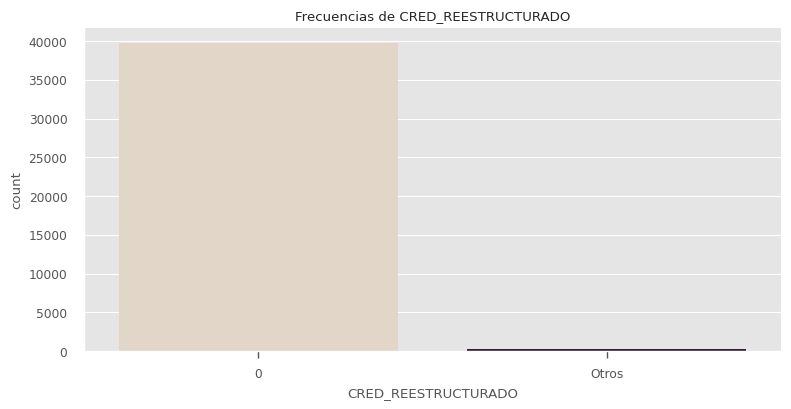

Proporciones de cada categoría antes de agrupar 'Otros' en TIENE_HIPOTECA:
 TIENE_HIPOTECA
0     0.775450
-1    0.133375
1     0.091175
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

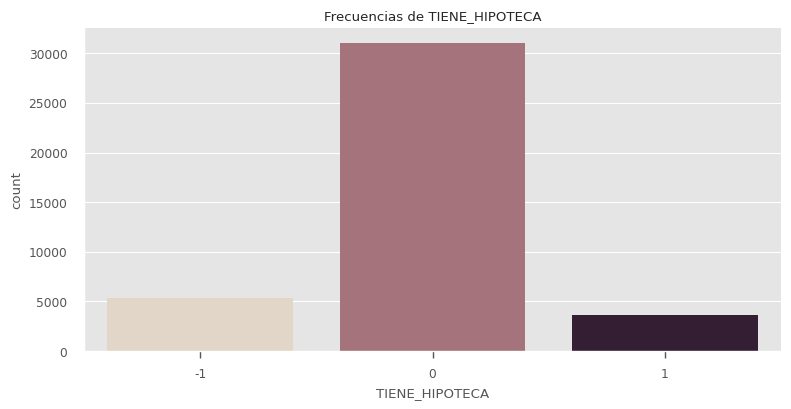

Proporciones de cada categoría antes de agrupar 'Otros' en CLIENTE_MORA:
 CLIENTE_MORA
0    0.921375
1    0.078625
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

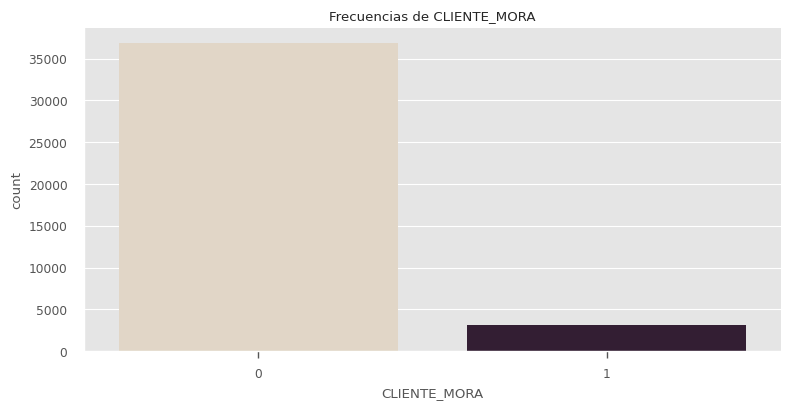

In [95]:
info_frecuencia(datos[[
    'SEXO',
    'CRED_REESTRUCTURADO',
    'TIENE_HIPOTECA',
    'ESTADO_MORA_FIN',
    'ESTADO_MORA_REAL',
    'CLIENTE_MORA'
]])

Nota: De acuerdo al desbalanceo y poca variabilidad de la variable CRED_REESTRUCTURADO, en donde la categoría 0 tiene más del 99%, se descartará ya que la información que aporta no va hacer significativa

* La Variable de interés es la variable llamada CLIENTE_MORA, que es 1 si el cliente tuvo una mora mayor a 90 días en los doce meses siguientes al desembolso del credito y 0 si ha estado al día.

* La base con 40.000 clientes, contiene un 7.86% de clientes en mora y un 92.13% de clientes al día

Text(0.5, 1.0, 'Score Datacredito Clientes al día y en mora')

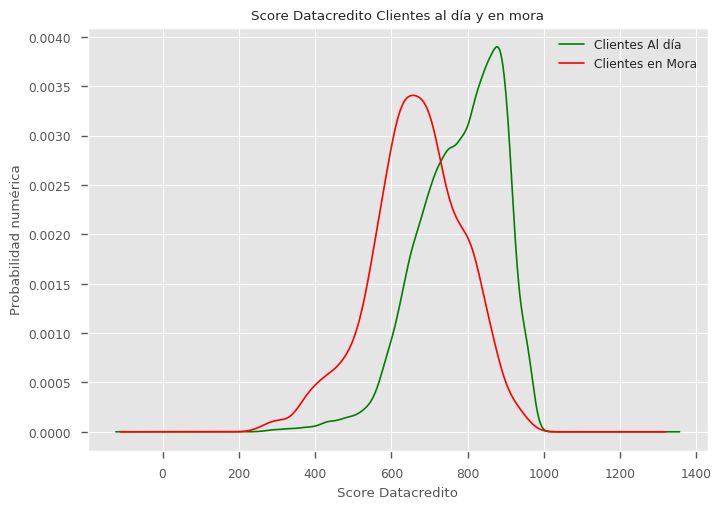

In [96]:
#Separación de Bases
datos_0 = datos[datos['CLIENTE_MORA'] == 0]
datos_1 = datos[datos['CLIENTE_MORA'] == 1]

#Función de densidad
datos_0.SCORE_DATACREDITO.plot.density(color='green',label='Clientes Al día')
datos_1.SCORE_DATACREDITO.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Score Datacredito")
plt.ylabel('Probabilidad numérica')
plt.title('Score Datacredito Clientes al día y en mora')

* Se evidencia que los clientes que han tenido una mora de 90 días o más en los 12 ultimos meses tienen un Score Advance (cálculo por datacredito) menor a los clientes que han estado al día. También se resalta que, la mayoría de clientes en mora tienen un Score Advance entre 500 a 850, en cambio los clientes que han estado al día tienen un score adnvance entre 650 a 950.

### Pruebas estadísticas

In [97]:
# Test de normalidad Shapiro-Wilk
print("Prueba Shapiro-Wilk Población al día:",shapiro(datos_0['SCORE_DATACREDITO']))
print("Prueba Shapiro-Wilk Población en mora:",shapiro(datos_1['SCORE_DATACREDITO']))

Prueba Shapiro-Wilk Población al día: ShapiroResult(statistic=np.float64(0.9604629152610893), pvalue=np.float64(3.497891665963961e-69))
Prueba Shapiro-Wilk Población en mora: ShapiroResult(statistic=np.float64(0.9901863098442275), pvalue=np.float64(6.594495942150208e-14))


In [98]:
# Diferencia de medias
def dif_medias (df1, df2, alfa):
    stat, p = ttest_ind(df1,df2, equal_var = False)
    print("Statistic=%.3f, p=%.3f" % (stat,p))

dif_medias (datos_0['SCORE_DATACREDITO'], datos_1['SCORE_DATACREDITO'], 0.05)

Statistic=51.261, p=0.000


In [99]:
# Prueba no parametrcia Mann-Whitney para comparar la variable ADVANCE en los dos grupos
stat, p = mannwhitneyu(datos_0['SCORE_DATACREDITO'], datos_1['SCORE_DATACREDITO'], alternative='two-sided')

print("Mann-Whitney U Test")
print(f"Estadístico U = {stat:.3f}, p-valor = {p:.3e}")

# Interpretación rápida
alpha = 0.05
if p < alpha:
    print("👉 Se rechaza H0: Las distribuciones de ADVANCE en los dos grupos son diferentes.")
else:
    print("👉 No se rechaza H0: No hay evidencia de diferencia significativa entre los grupos.")

Mann-Whitney U Test
Estadístico U = 88669802.000, p-valor = 0.000e+00
👉 Se rechaza H0: Las distribuciones de ADVANCE en los dos grupos son diferentes.


In [100]:
datos.head()

,CLIENTE_MORA,SEXO,EDAD,INGRESO,SCORE_DATACREDITO,CRED_REESTRUCTURADO,ANT_SF,SALDO_SF,TIENE_HIPOTECA,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
0,0,1,51,5.373539,675,0,6.83,133.124423,0,35,86.191899,68.093088,0.0,0.0
1,0,0,32,20.009334,812,0,7.83,282.607212,0,18,68.242921,19.081655,0.0,0.0
2,0,0,58,5.537541,812,0,6.17,10.650218,0,3,26.764786,44.264709,0.0,0.0
3,0,1,40,5.838028,840,0,7.00,87.428428,1,7,32.291321,29.558226,0.0,0.0
4,0,0,63,2.192562,625,0,0.00,0.000000,0,-1,0.000000,0.000000,0.0,0.0


In [101]:
variables_numericas = [
    'INGRESO', 'SCORE_DATACREDITO',
    'ANT_SF', 'SALDO_SF', 'ULTIMAPERTURA',
    'SALDO_FIJO', 'SALDO_ROT', 'ESTADO_MORA_FIN', 'ESTADO_MORA_REAL'
]

resultados = []

for variable in variables_numericas:

    stat, p_value = mannwhitneyu(datos_0[variable], datos_1[variable], alternative='two-sided')

    alpha = 0.05
    significativo = "Sí" if p_value < alpha else "No"

    resultados.append({
        'Variable': variable,
        'Estadístico_U': round(stat, 3),
        'P_valor': f"{p_value:.3e}",
        'Significativo_(α=0.05)': significativo
    })

df_pruebas_mann_whitney = pd.DataFrame(resultados)

display(df_pruebas_mann_whitney)

n_significativas = df_pruebas_mann_whitney[df_pruebas_mann_whitney['Significativo_(α=0.05)'] == 'Sí'].shape[0]
print(f"\nResumen: {n_significativas} de {len(variables_numericas)} variables muestran diferencias estadísticamente significativas entre grupos.")

,Variable,Estadístico_U,P_valor,Significativo_(α=0.05)
0,INGRESO,64975804.0,1.377e-29,Sí
1,SCORE_DATACREDITO,88669802.0,0.000e+00,Sí
2,ANT_SF,66704326.5,5.050e-45,Sí
3,SALDO_SF,57712903.0,6.972e-01,No
4,ULTIMAPERTURA,62630872.0,4.660e-14,Sí
5,SALDO_FIJO,50331621.0,4.710e-35,Sí
6,SALDO_ROT,47394860.5,2.950e-65,Sí
7,ESTADO_MORA_FIN,43499373.5,1.066e-195,Sí
8,ESTADO_MORA_REAL,52340801.0,4.250e-67,Sí



Resumen: 8 de 9 variables muestran diferencias estadísticamente significativas entre grupos.


Text(0.5, 1.0, 'SALDO_SF Clientes al día y en mora')

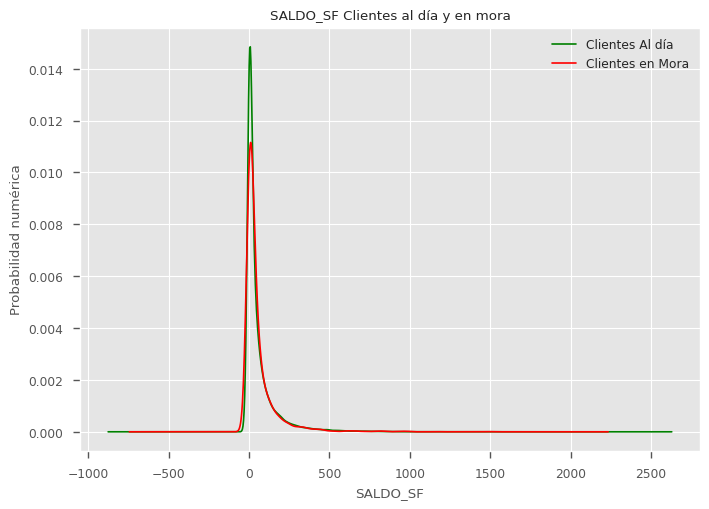

In [102]:
#Función de densidad
datos_0.SALDO_SF.plot.density(color='green',label='Clientes Al día')
datos_1.SALDO_SF.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("SALDO_SF")
plt.ylabel('Probabilidad numérica')
plt.title('SALDO_SF Clientes al día y en mora')

* Existe evidencia estadísticamente significativa para afirmar que las medias de la variable ADVANCE en los dos grupos comparados (datos_0 y datos_1) son diferentes, es decir que la variables SCORE_DATACREDITO y las demás variables numéricas excepto SALDO_SF son altamente discriminante entre ambos grupos con una significancia de 0.05.
* SALDO_SF estadísticamente no es discriminante entre los grupos, y este análisis se tendra en cuenta en los demás análisi y en los modelos.

Text(0.5, 1.0, 'Antigüedad Financiera de Clientes al día y en mora')

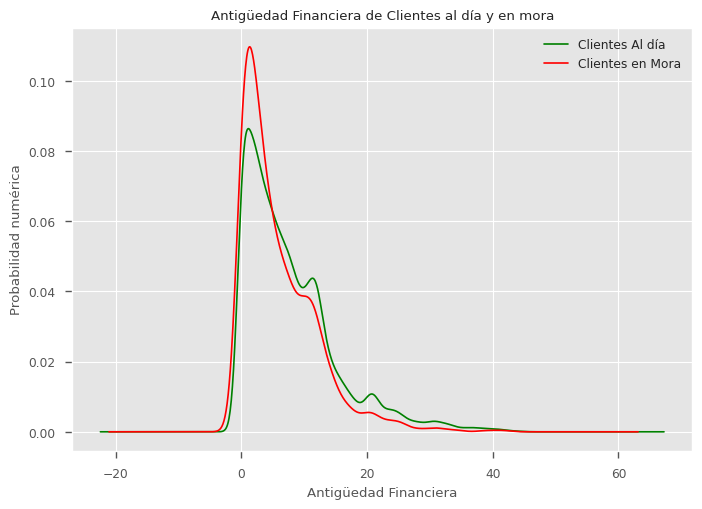

In [103]:
datos_0.ANT_SF.plot.density(color='green',label='Clientes Al día')
datos_1.ANT_SF.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Antigüedad Financiera")
plt.ylabel('Probabilidad numérica')
plt.title('Antigüedad Financiera de Clientes al día y en mora')

* Se evidencia como lo clientes que estan al día tienden  a tener mayor antiguedad en el sector financiero a comparación de los cliente en mora.

In [104]:
# prueba K-S
stats.ks_2samp(datos_0['ANT_SF'], datos_1['ANT_SF'])

KstestResult(statistic=np.float64(0.11398107868696111), pvalue=np.float64(2.9720346467054806e-33), statistic_location=np.float64(4.83), statistic_sign=np.int8(-1))

Text(0.5, 1.0, 'Edad Clientes al día y en mora')

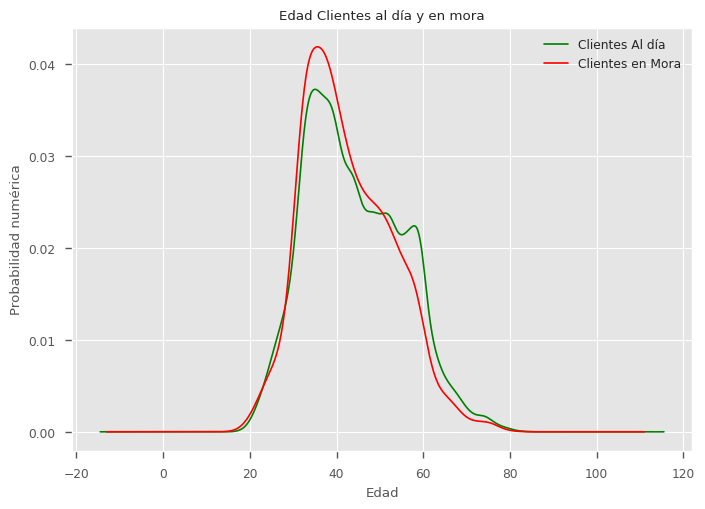

In [105]:
datos_0.EDAD.plot.density(color='green',label='Clientes Al día')
datos_1.EDAD.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Edad")
plt.ylabel('Probabilidad numérica')
plt.title('Edad Clientes al día y en mora')

* Los clientes en mora tienden a concentrarse en edades entre los 30 a los 40 años, en cambio los clientes al día tienden a ser de mayor edad.

In [106]:
pd.crosstab(datos['SEXO'], datos['CLIENTE_MORA'], normalize='index')*100

CLIENTE_MORA,0,1
SEXO,,
0,91.675649,8.324351
1,92.618683,7.381317


* Se evidencia que las mujeres pagan mejor que los hombres, dado que el porcentaje de incumplimiento de las mujeres es 6.7% en cambio de los hombres es de 7.5%.

Text(0.5, 1.0, 'Ingresos de Clientes al día y en mora')

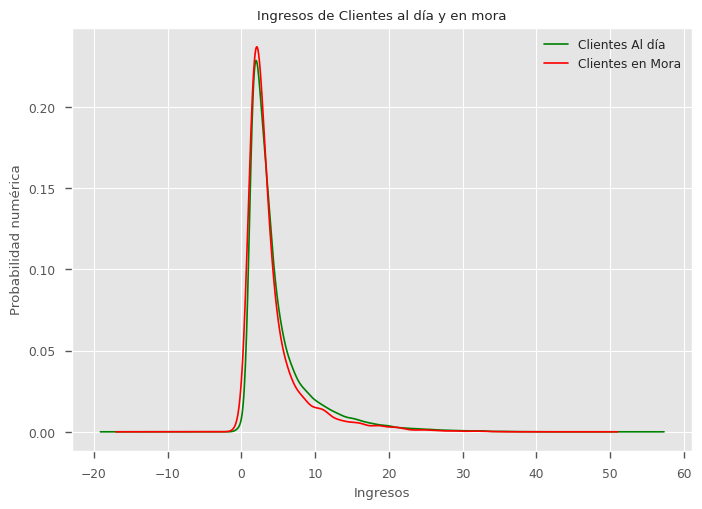

In [107]:
datos_0.INGRESO.plot.density(color='green',label='Clientes Al día')
datos_1.INGRESO.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Ingresos")
plt.ylabel('Probabilidad numérica')
plt.title('Ingresos de Clientes al día y en mora')

* Se evidencia que no existen diferencias de ingreso respecto al incumplimiento de pago de los clientes, aunque estadísticamente si existe diferencia entre los ingresos de los grupos con un p-valor de 1.377e-29. Esto se tendra en cuenta para los análisis posteriores.

In [108]:
for col in ['SEXO','TIENE_HIPOTECA']:
    tabla = pd.crosstab(datos[col], datos['CLIENTE_MORA'])
    chi2, p, dof, exp = chi2_contingency(tabla)
    print(f"{col}: p-valor={p:.4e}")


SEXO: p-valor=4.9325e-04
TIENE_HIPOTECA: p-valor=1.6702e-07


### Correlación

In [109]:
# Matriz de correlación Pearson compacta con encabezados verticales sin superposición
datos['CLIENTE_MORA']=datos['CLIENTE_MORA'].astype('int64')
corr = datos.select_dtypes(include='number').corr().round(2)

display(
    corr.style
        .format("{:.2f}")
        .background_gradient(cmap="BrBG")
        # fuente y padding pequeños en todo
        .set_properties(**{"font-size":"8pt", "padding":"2px"})
        # estilos específicos de encabezados
        .set_table_styles([
            # columnas: vertical, ancho fijo pequeño, sin quiebre ni solape
            {"selector":"th.col_heading",
             "props":[
                 ("writing-mode","vertical-rl"),
                 ("text-orientation","mixed"),
                 ("width","24px"), ("min-width","24px"), ("max-width","24px"),
                 ("height","140px"),
                 ("white-space","nowrap"),
                 ("overflow","hidden"),
                 ("text-overflow","clip"),
                 ("font-size","7pt"),
                 ("padding","6px 2px")
             ]},
            # filas: fuente pequeña
            {"selector":"th.row_heading",
             "props":[("font-size","7pt"), ("white-space","nowrap")]}
        ])
)

,CLIENTE_MORA,EDAD,INGRESO,SCORE_DATACREDITO,ANT_SF,SALDO_SF,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
CLIENTE_MORA,1.00,-0.04,-0.04,-0.27,-0.07,-0.01,-0.04,0.05,0.11,0.13,0.07
EDAD,-0.04,1.00,0.23,0.19,0.46,0.08,0.09,-0.00,-0.06,0.01,0.00
INGRESO,-0.04,0.23,1.00,0.16,0.47,0.70,-0.03,0.16,0.14,-0.02,-0.07
SCORE_DATACREDITO,-0.27,0.19,0.16,1.00,0.28,0.06,0.21,-0.20,-0.32,-0.36,-0.33
ANT_SF,-0.07,0.46,0.47,0.28,1.00,0.27,0.24,0.02,0.11,0.01,-0.03
SALDO_SF,-0.01,0.08,0.70,0.06,0.27,1.00,-0.07,0.18,0.16,-0.01,-0.06
ULTIMAPERTURA,-0.04,0.09,-0.03,0.21,0.24,-0.07,1.00,-0.14,0.04,0.06,0.02
SALDO_FIJO,0.05,-0.00,0.16,-0.20,0.02,0.18,-0.14,1.00,0.22,0.13,0.11
SALDO_ROT,0.11,-0.06,0.14,-0.32,0.11,0.16,0.04,0.22,1.00,0.06,-0.02
ESTADO_MORA_FIN,0.13,0.01,-0.02,-0.36,0.01,-0.01,0.06,0.13,0.06,1.00,0.79


In [110]:
# Matriz de correlación Spearman compacta con encabezados verticales sin superposición
datos['CLIENTE_MORA']=datos['CLIENTE_MORA'].astype('int64')
corr = datos.select_dtypes(include='number').corr('spearman').round(2)

display(
    corr.style
        .format("{:.2f}")
        .background_gradient(cmap="BrBG")
        # fuente y padding pequeños en todo
        .set_properties(**{"font-size":"8pt", "padding":"2px"})
        # estilos específicos de encabezados
        .set_table_styles([
            # columnas: vertical, ancho fijo pequeño, sin quiebre ni solape
            {"selector":"th.col_heading",
             "props":[
                 ("writing-mode","vertical-rl"),
                 ("text-orientation","mixed"),
                 ("width","24px"), ("min-width","24px"), ("max-width","24px"),
                 ("height","140px"),
                 ("white-space","nowrap"),
                 ("overflow","hidden"),
                 ("text-overflow","clip"),
                 ("font-size","7pt"),
                 ("padding","6px 2px")
             ]},
            # filas: fuente pequeña
            {"selector":"th.row_heading",
             "props":[("font-size","7pt"), ("white-space","nowrap")]}
        ])
)

,CLIENTE_MORA,EDAD,INGRESO,SCORE_DATACREDITO,ANT_SF,SALDO_SF,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
CLIENTE_MORA,1.00,-0.03,-0.06,-0.25,-0.07,0.00,-0.04,0.06,0.09,0.15,0.09
EDAD,-0.03,1.00,0.27,0.20,0.39,0.09,0.08,0.01,-0.04,-0.00,-0.03
INGRESO,-0.06,0.27,1.00,0.27,0.59,0.69,0.12,0.22,0.30,0.08,-0.08
SCORE_DATACREDITO,-0.25,0.20,0.27,1.00,0.33,0.07,0.24,-0.21,-0.27,-0.29,-0.28
ANT_SF,-0.07,0.39,0.59,0.33,1.00,0.44,0.37,0.08,0.28,0.08,-0.07
SALDO_SF,0.00,0.09,0.69,0.07,0.44,1.00,0.08,0.42,0.41,0.10,-0.07
ULTIMAPERTURA,-0.04,0.08,0.12,0.24,0.37,0.08,1.00,-0.05,0.17,0.03,-0.03
SALDO_FIJO,0.06,0.01,0.22,-0.21,0.08,0.42,-0.05,1.00,0.24,0.14,0.08
SALDO_ROT,0.09,-0.04,0.30,-0.27,0.28,0.41,0.17,0.24,1.00,0.17,0.00
ESTADO_MORA_FIN,0.15,-0.00,0.08,-0.29,0.08,0.10,0.03,0.14,0.17,1.00,0.60


### Eliminación de variables VIF

In [111]:
# 1) Solo numéricas y limpieza mínima
num = datos.select_dtypes(include='number').copy()
num = num.dropna(axis=1, how='all')                 # quita columnas totalmente vacías
num = num.loc[:, num.nunique()>1]                   # quita columnas con varianza 0
num = num.fillna(num.median(numeric_only=True))     # imputación simple (si hay NA)

# 2) Matriz para VIF (no necesita estandarizar)
X = sm.add_constant(num, has_constant='add')

# 3) Calcular VIF (omitimos la constante en el resultado)
vif_vals = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vifs = (pd.DataFrame({'Variable': num.columns, 'VIF': vif_vals})
          .replace([np.inf, -np.inf], np.nan)
          .sort_values('VIF', ascending=False)
          .reset_index(drop=True))

# 4) Mostrar
display(vifs.style.format({'VIF':'{:.2f}'}))


,Variable,VIF
0,ESTADO_MORA_FIN,2.76
1,ESTADO_MORA_REAL,2.72
2,INGRESO,2.40
3,SALDO_SF,2.01
4,ANT_SF,1.75
5,SCORE_DATACREDITO,1.67
6,EDAD,1.29
7,SALDO_ROT,1.29
8,ULTIMAPERTURA,1.17
9,SALDO_FIJO,1.14


Según el VIF no hay problemas de multicolinealidad, sin embargo:

* Según las dos matrices de correlación, y las pruebas estadísticas anteriores para el modelado se descartan las variables, SALDO_SF y ESTADO_MORA_REAL.
* SALDO_SF se descarta debido a su alta correlación con INGRESO además que individualmente la variable SALDO_SF recordemos que no discrimina bien la variable objetivo.
* Y ESTADO_MORA_REAL se descarta por su alta correlación con ESTADO_MORA_FIN y fue escogida ya que su p-valor de diferencias entre los grupos de la variable objetivo es menor al p-valor de  ESTADO_MORA_FIN.

In [112]:
datos.drop(columns=['SALDO_SF', 'ESTADO_MORA_REAL', 'CRED_REESTRUCTURADO'], inplace=True)

En resumen, se identificó un desbalance de clases (7.9 % mora), ausencia de colinealidad significativa (VIF < 3), y variables numéricas discriminantes (SCORE_DATACREDITO, ANT_SF, SALDO_ROT). Se descartaron SALDO_SF y ESTADO_MORA_REAL por redundancia y bajo poder discriminante. El dataset queda preparado para modelado supervisado.”

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h2 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        4. Modelado
    </h2>
</div>

# Pipelines

In [113]:
# X e y
X = datos.drop(columns='CLIENTE_MORA')
y = datos['CLIENTE_MORA']

# Detecta columnas
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols)
], remainder='drop')

X_pre = preprocess.fit_transform(X)
print(f"Shape original: {X.shape} → transformado: {X_pre.shape}")



Shape original: (40000, 10) → transformado: (40000, 10)


In [114]:
cat_cols

['SEXO', 'TIENE_HIPOTECA']

In [115]:
datos['TIENE_HIPOTECA'].unique()

array([0, 1, -1], dtype=object)

In [116]:
num_cols

['EDAD',
 'INGRESO',
 'SCORE_DATACREDITO',
 'ANT_SF',
 'ULTIMAPERTURA',
 'SALDO_FIJO',
 'SALDO_ROT',
 'ESTADO_MORA_FIN']

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h3 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        4.1 Arboles de decisión
    </h3>
</div>

## Partición Train Test

In [117]:
from sklearn.model_selection import train_test_split

seed = 2025
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=seed, stratify=y, shuffle=True
)

# asegurar que preprocessing_pipeline exista
try:
    preprocessing_pipeline
except NameError:
    preprocessing_pipeline = preprocess

print(f"Split OK → X_train: {X_train.shape}, X_test: {X_test.shape}, seed={seed}")
print("preprocessing_pipeline definido ✅")


Split OK → X_train: (28000, 10), X_test: (12000, 10), seed=2025
preprocessing_pipeline definido ✅


## Funciones de evaluación

In [118]:
def evaluar_modelo(best_model, X_train, y_train, X_test, y_test, nombre="Modelo", pos_label=1):
    """Imprime métricas y devuelve un dict con resultados clave."""
    # Predicciones duras
    pred_train = best_model.predict(X_train)
    pred_test  = best_model.predict(X_test)

    # Probabilidades para AUC y PR-AUC
    if hasattr(best_model, "predict_proba"):
        proba_test = best_model.predict_proba(X_test)[:, 1]
    else:
        proba_test = best_model.decision_function(X_test)

    # Métricas
    train_acc    = accuracy_score(y_train, pred_train)
    test_acc     = accuracy_score(y_test,  pred_test)
    train_recall = recall_score(y_train, pred_train, pos_label=pos_label, zero_division=0)
    test_recall  = recall_score(y_test,  pred_test,  pos_label=pos_label, zero_division=0)
    train_prec   = precision_score(y_train, pred_train, pos_label=pos_label, zero_division=0)
    test_prec    = precision_score(y_test,  pred_test,  pos_label=pos_label, zero_division=0)
    roc_test     = roc_auc_score(y_test, proba_test)
    pr_test      = average_precision_score(y_test, proba_test)

    # Reporte
    print(f"=== {nombre} ===")
    print('Train Accuracy  : ', train_acc)
    print('Test  Accuracy  : ', test_acc)
    print('Train Recall    : ', train_recall)
    print('Test  Recall    : ', test_recall)
    print('Train Precision : ', train_prec)
    print('Test  Precision : ', test_prec)
    print('ROC AUC (test)  : ', roc_test)

    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, pred_test))

    print('\nClassification Report:')
    print(classification_report(y_test, pred_test, zero_division=0))

    return {
        "train_acc":    train_acc,
        "test_acc":     test_acc,
        "train_recall": train_recall,
        "test_recall":  test_recall,
        "train_prec":   train_prec,
        "test_prec":    test_prec,
        "roc_auc":      roc_test
    }


# Definicion Hiperparámetros y CV

In [119]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

seed = globals().get('seed', 42)

# param_grid = {
#     "model": [DecisionTreeClassifier(random_state=seed)],
#     "model__criterion": ["gini", "entropy"],
#     "model__splitter": ["best", "random"],
#     "model__max_leaf_nodes": [128, 256, 512, 1024],
#     "model__max_depth": list(map(int, np.linspace(4, 16, 32)))
# }

# param_grid = {
#   "model": [DecisionTreeClassifier(random_state=seed)],
#   "model__criterion": ["gini","entropy"],
#   "model__splitter": ["best"],
#   "model__max_depth": [3,4,6,8],
#   "model__max_leaf_nodes": [64,128,256,512],
#   "model__min_samples_leaf": [1,2,5,10],
#   "model__class_weight": [None, "balanced", {0:1, 1:2}, {0:1, 1:3}]
# }

param_grid = {
    "model": [DecisionTreeClassifier(random_state=seed)],
    "model__criterion": ["gini", "entropy"], 
    "model__splitter": ["best", "random"],
    "model__max_depth": [4, 6, 8, 10, 12],
    "model__max_leaf_nodes": [128, 256, 512, 1024],
    "model__min_samples_leaf": [1, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_impurity_decrease": [0.0, 0.001, 0.01],
    "model__class_weight": [
        None,
        "balanced",
        {0: 1, 1: 2},
        {0: 1, 1: 3},
        {0: 1, 1: 5}
    ],
    "model__ccp_alpha": [0.0, 0.0005, 0.001, 0.005]
}


scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
n_iter = 100

## Pipeline base (sin balanceo)

In [120]:
if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    full_pipeline_steps = [
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('model', DecisionTreeClassifier(random_state=seed))
    ]
    full_pipeline = Pipeline(steps=full_pipeline_steps)

    grid_base = RandomizedSearchCV(
        estimator=full_pipeline,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )
    best_model_base = grid_base.fit(X_train, y_train)
    print(">> Mejor AUC (CV) – Base:", best_model_base.best_score_)

    # === Métricas adicionales: Recall y AUC en train y test ===
    est = best_model_base.best_estimator_

    # Predicciones duras
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    # Scores probabilísticos para AUC
    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

else:
    print("⛔ Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")


>> Mejor AUC (CV) – Base: 0.7675550157196315


## Undersampling dentro del CV

In [121]:
if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    undersampler = RandomUnderSampler(random_state=seed)

    pipe_under = ImbPipeline(steps=[
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('sampler', undersampler),
        ('model', DecisionTreeClassifier(random_state=seed))
    ])

    grid_under = RandomizedSearchCV(
        estimator=pipe_under,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )

    best_model_under = grid_under.fit(X_train, y_train)
    print(">> Mejor AUC (CV) – Undersampling:", best_model_under.best_score_)

    # Métricas rápidas (train/test) para Recall y AUC
    est = best_model_under.best_estimator_
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

    print(f"Train Recall: {recall_score(y_train, pred_train, zero_division=0):.4f} | "
          f"Train AUC: {roc_auc_score(y_train, score_train):.4f}")
    print(f"Test  Recall: {recall_score(y_test,  pred_test,  zero_division=0):.4f} | "
          f"Test  AUC:  {roc_auc_score(y_test,  score_test):.4f}")
else:
    print("⛔ Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")


>> Mejor AUC (CV) – Undersampling: 0.7609766943224768
Train Recall: 0.7811 | Train AUC: 0.7701
Test  Recall: 0.7709 | Test  AUC:  0.7641


## Oversampling dentro del CV

In [122]:
if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    oversampler = RandomOverSampler(random_state=seed)

    pipe_over = ImbPipeline(steps=[
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('sampler', oversampler),
        ('model', DecisionTreeClassifier(random_state=seed))
    ])

    grid_over = RandomizedSearchCV(
        estimator=pipe_over,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )

    best_model_over = grid_over.fit(X_train, y_train)
    print(">> Mejor AUC (CV) – Oversampling:", best_model_over.best_score_)

    # Métricas rápidas (train/test) para Recall y AUC
    est = best_model_over.best_estimator_
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

    print(f"Train Recall: {recall_score(y_train, pred_train, zero_division=0):.4f} | "
          f"Train AUC: {roc_auc_score(y_train, score_train):.4f}")
    print(f"Test  Recall: {recall_score(y_test,  pred_test,  zero_division=0):.4f} | "
          f"Test  AUC:  {roc_auc_score(y_test,  score_test):.4f}")
else:
    print("⛔ Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")


>> Mejor AUC (CV) – Oversampling: 0.7646600375155443
Train Recall: 0.7502 | Train AUC: 0.7748
Test  Recall: 0.7487 | Test  AUC:  0.7689


## SMOTE dentro del CV

In [124]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, roc_auc_score  # por si faltan

if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    smote = SMOTE(random_state=seed, k_neighbors=5)  # puedes tunear k_neighbors

    pipe_smote = ImbPipeline(steps=[
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('sampler', smote),
        ('model', DecisionTreeClassifier(random_state=seed))
    ])

    grid_smote = RandomizedSearchCV(
        estimator=pipe_smote,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )

    best_model_smote = grid_smote.fit(X_train, y_train)
    print(">> Mejor AUC (CV) – SMOTE:", best_model_smote.best_score_)

    # Métricas rápidas (train/test) para Recall y AUC
    est = best_model_smote.best_estimator_
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

    print(f"Train Recall: {recall_score(y_train, pred_train, zero_division=0):.4f} | "
          f"Train AUC: {roc_auc_score(y_train, score_train):.4f}")
    print(f"Test  Recall: {recall_score(y_test,  pred_test,  zero_division=0):.4f} | "
          f"Test  AUC:  {roc_auc_score(y_test,  score_test):.4f}")
else:
    print("⛔ Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")

>> Mejor AUC (CV) – SMOTE: 0.7562580222982322
Train Recall: 0.5636 | Train AUC: 0.7491
Test  Recall: 0.5620 | Test  AUC:  0.7384


,Variable,Importancia
2,SCORE_DATACREDITO,0.933051
7,ESTADO_MORA_FIN,0.056593
3,ANT_SF,0.010356
0,EDAD,0.000000
1,INGRESO,0.000000
4,ULTIMAPERTURA,0.000000
5,SALDO_FIJO,0.000000
6,SALDO_ROT,0.000000
8,SEXO,0.000000
9,TIENE_HIPOTECA,0.000000


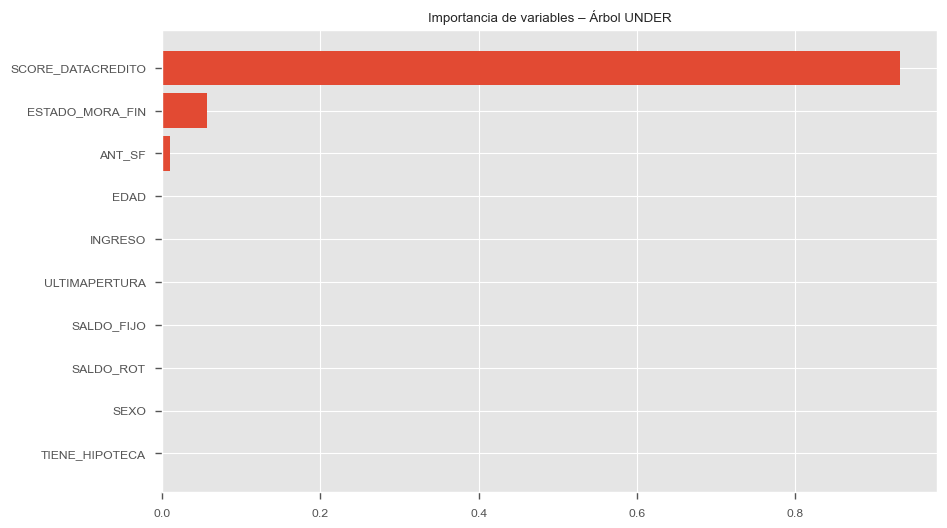

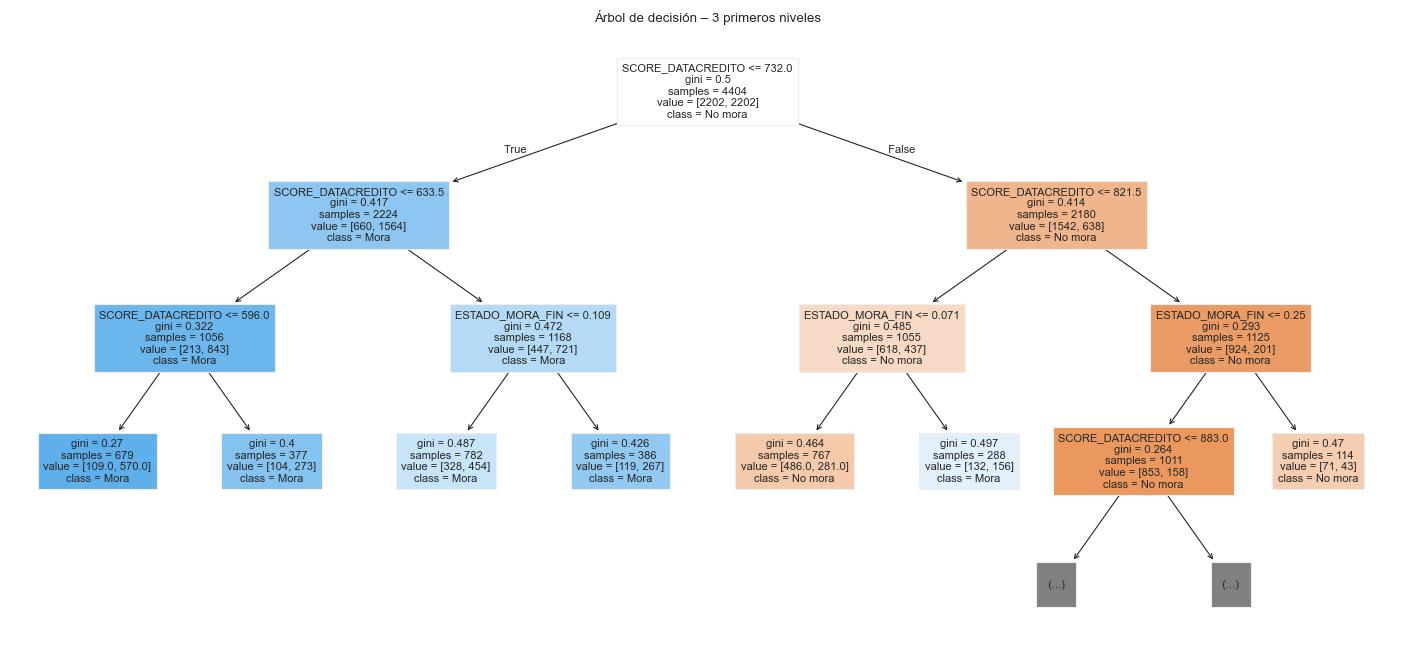

In [ ]:
# === Importancia de Variables del mejor modelo (UNDER) ===
from sklearn.tree import plot_tree
importances = best_model_under.best_estimator_['model'].feature_importances_

# Recuperar nombres de columnas del preprocesamiento
feature_names = (
    num_cols + cat_cols
    if 'num_cols' in globals() and 'cat_cols' in globals()
    else [f'var_{i}' for i in range(len(importances))]
)

importancias = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

display(importancias.style.background_gradient(cmap='YlOrRd'))

plt.figure(figsize=(10, 6))
plt.barh(importancias['Variable'], importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title("Importancia de variables – Árbol UNDER")
plt.show()

# === Visualizar árbol resumido (primeros niveles) ===
plt.figure(figsize=(18,8))
plot_tree(
    best_model_under.best_estimator_['model'],
    feature_names=feature_names,
    class_names=["No mora","Mora"],
    filled=True,
    max_depth=3, # solo 3 niveles para que se lea
    fontsize=8
)
plt.title("Árbol de decisión – 3 primeros niveles")
plt.show()


## Validaciones finales

In [ ]:
# ===== 10. Validaciones finales (incluye SMOTE si existe) =====
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, average_precision_score,
    confusion_matrix, classification_report
)
models_to_eval = []
if 'best_model_base'  in globals(): models_to_eval.append(("Árbol – Base (sin balanceo)", best_model_base.best_estimator_))
if 'best_model_under' in globals(): models_to_eval.append(("Árbol – Undersampling",        best_model_under.best_estimator_))
if 'best_model_over'  in globals(): models_to_eval.append(("Árbol – Oversampling",         best_model_over.best_estimator_))
if 'best_model_smote' in globals(): models_to_eval.append(("Árbol – SMOTE",                best_model_smote.best_estimator_))

if models_to_eval:
    metrics_map = {}
    for nombre, est in models_to_eval:
        metrics_map[nombre] = evaluar_modelo(est, X_train, y_train, X_test, y_test, nombre=nombre)

    # (opcional) dejar variables sueltas como antes:
    if 'best_model_base'  in globals(): metrics_base  = metrics_map["Árbol – Base (sin balanceo)"]
    if 'best_model_under' in globals(): metrics_under = metrics_map["Árbol – Undersampling"]
    if 'best_model_over'  in globals(): metrics_over  = metrics_map["Árbol – Oversampling"]
    if 'best_model_smote' in globals(): metrics_smote = metrics_map["Árbol – SMOTE"]
else:
    print("⛔ No hay modelos para evaluar. Ejecuta primero Base/Under/Over/SMOTE.")

=== Árbol – Base (sin balanceo) ===
Train Accuracy  :  0.9222857142857143
Test  Accuracy  :  0.9205
Train Recall    :  0.03496821071752952
Test  Recall    :  0.024390243902439025
Train Precision :  0.6015625
Test  Precision :  0.40350877192982454
ROC AUC (test)  :  0.7652223592948562

Confusion Matrix:
[[11023    34]
 [  920    23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11057
           1       0.40      0.02      0.05       943

    accuracy                           0.92     12000
   macro avg       0.66      0.51      0.50     12000
weighted avg       0.88      0.92      0.89     12000

=== Árbol – Undersampling ===
Train Accuracy  :  0.6421071428571429
Test  Accuracy  :  0.63725
Train Recall    :  0.7811080835603996
Test  Recall    :  0.7709437963944857
Train Precision :  0.15276667554845014
Test  Precision :  0.1494654605263158
ROC AUC (test)  :  0.7640819752960438

Confusion Matrix:
[[6920 41

In [ ]:
# === Comparación de overfitting (entrenamiento vs test) ===
if 'metrics_under' in globals():
    print("=== Análisis de sobreajuste – Modelo UNDER ===")
    delta_recall = metrics_under['train_recall'] - metrics_under['test_recall']
    print(f"Recall Train : {metrics_under['train_recall']:.4f}")
    print(f"Recall Test  : {metrics_under['test_recall']:.4f}")
    print(f"Diferencia (Overfitting) = {delta_recall:+.4f}")


=== Análisis de sobreajuste – Modelo UNDER ===
Recall Train : 0.7811
Recall Test  : 0.7709
Diferencia (Overfitting) = +0.0102


In [ ]:
metrics_base

{'train_acc': 0.9222857142857143,
 'test_acc': 0.9205,
 'train_recall': 0.03496821071752952,
 'test_recall': 0.024390243902439025,
 'train_prec': 0.6015625,
 'test_prec': 0.40350877192982454,
 'roc_auc': 0.7652223592948562}

## Escoger el mejor modelo y extraer el árbol final

In [ ]:
candidatos = []

if 'best_model_base'  in globals() and 'metrics_base'  in globals():
    candidatos.append(("base",  best_model_base,  metrics_base["test_recall"]))
if 'best_model_under' in globals() and 'metrics_under' in globals():
    candidatos.append(("under", best_model_under, metrics_under["test_recall"]))
if 'best_model_over'  in globals() and 'metrics_over'  in globals():
    candidatos.append(("over",  best_model_over,  metrics_over["test_recall"]))
if 'best_model_smote' in globals() and 'metrics_smote' in globals():
    candidatos.append(("smote", best_model_smote, metrics_smote["test_recall"]))

if candidatos:
    mejor_nombre, best_model, best_rec = max(candidatos, key=lambda x: x[2])
    print(f"\n>>> Mejor enfoque según Recall (test): {mejor_nombre.upper()} con Recall={best_rec:.4f}")
    dt_model = best_model.best_estimator_['model']
    print("\nHiperparámetros del árbol ganador:\n", dt_model.get_params())
else:
    print("⛔ No hay candidatos para comparar. Corre las celdas de entrenamiento/validación primero.")



>>> Mejor enfoque según Recall (test): UNDER con Recall=0.7709

Hiperparámetros del árbol ganador:
 {'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 256, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 20, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 2025, 'splitter': 'best'}


## Curvas ROC y Precision-Recall del modelo ganador

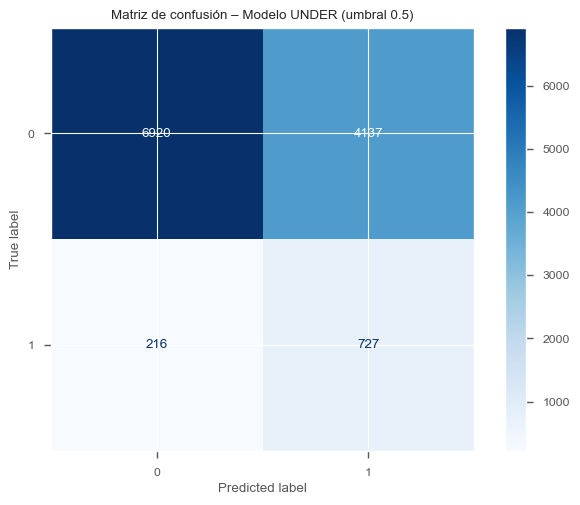

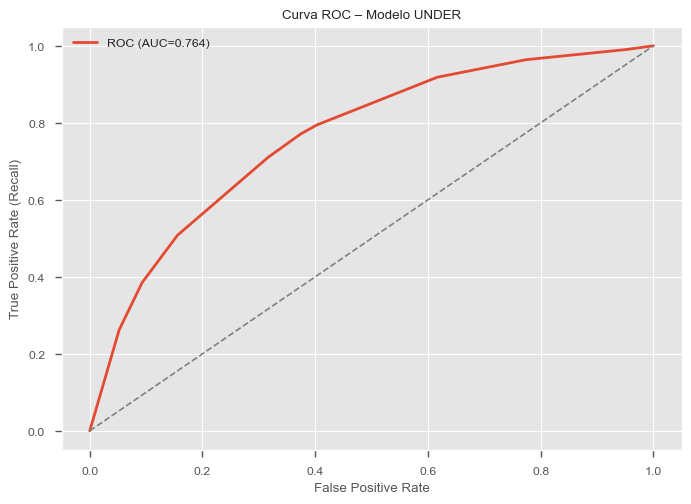

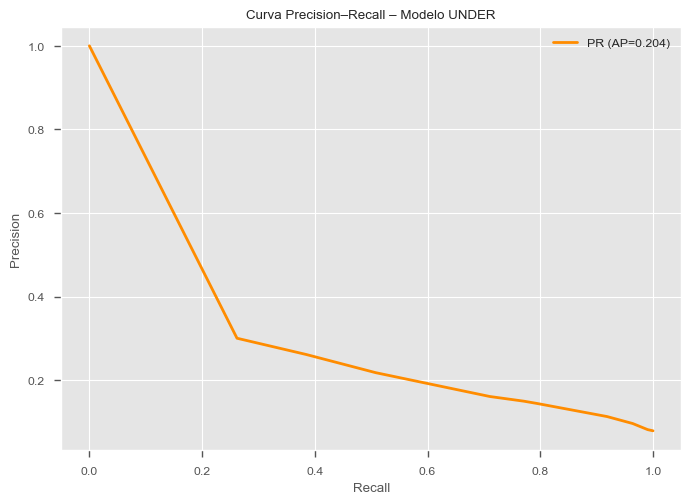

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

# === Modelo ganador: best_model_under ===
best_est = best_model_under.best_estimator_

# Probabilidades y predicciones en test
y_proba = best_est.predict_proba(X_test)[:,1]
y_pred  = (y_proba >= 0.5).astype(int)

# === Matriz de confusión ===
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Matriz de confusión – Modelo UNDER (umbral 0.5)")
plt.show()

# === Curva ROC ===
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})", lw=2)
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC – Modelo UNDER")
plt.legend()
plt.grid(True)
plt.show()

# === Curva Precision–Recall ===
prec, rec, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(rec, prec, label=f"PR (AP={ap:.3f})", lw=2, color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall – Modelo UNDER")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# === Predicción 10k (con recálculo de umbral) === 

# 1) Cargar y ALINEAR esquema exactamente como en el EDA 
df_10k = pd.read_csv("data/base_prueba_10k_sin_mora.csv") 

# Mismo mapeo que hiciste en EDA 
if 'SEXO' in df_10k.columns: 
    df_10k['SEXO'] = df_10k['SEXO'].replace({'M':0, 'F':1}).astype('object') 

for c in ['TIENE_HIPOTECA', 'CRED_REESTRUCTURADO', 'CLIENTE_MORA']: 
    if c in df_10k.columns: 
        df_10k[c] = df_10k[c].astype('object') 

# Eliminar las mismas columnas que retiraste en EDA 
cols_drop = ['ID', 'SALDO_SF', 'ESTADO_MORA_REAL', 'CRED_REESTRUCTURADO'] 
df_10k = df_10k.drop(columns=[c for c in cols_drop if c in df_10k.columns], errors='ignore') 

# Asegura que el set de columnas coincida con el de entrenamiento (X) 
expected_cols = X.columns
for c in expected_cols: 
    if c not in df_10k.columns: 
        df_10k[c] = 0 
df_10k = df_10k[expected_cols] 

print("✓ Datos de prueba alineados correctamente")

# 2) RECALCULAR UMBRAL desde datos de entrenamiento
# Obtener probabilidades del conjunto de entrenamiento
y_proba = best_est.predict_proba(X)[:, 1]

# Definir tasa de aprobación deseada (ajusta este valor según tu negocio)
# Por ejemplo: 0.70 = aprobar al 70% de clientes más seguros
tasa_aprob = 0.70  # <-- AJUSTA ESTE VALOR SEGÚN TU CRITERIO DE NEGOCIO

# Calcular umbral como el percentil correspondiente
umbral = np.quantile(y_proba, tasa_aprob)

print(f"\n--- Configuración de Umbral ---")
print(f"Tasa de aprobación objetivo: {tasa_aprob:.1%}")
print(f"Umbral de probabilidad: {umbral:.6f}")

# 3) Métricas en conjunto de entrenamiento (opcional pero útil)
aprobados_train = (y_proba <= umbral)
if y is not None:
    mora_en_aprobados = y[aprobados_train].mean()
    print(f"Tasa de mora en aprobados (train): {mora_en_aprobados:.2%}")

# 4) Probabilidades con el mejor modelo en 10k
probs_10k = best_est.predict_proba(df_10k)[:, 1] 

# 5) Aprobar (1) si proba <= umbral (clientes más seguros) 
df_10k_out = df_10k.copy() 
df_10k_out['proba_mora'] = probs_10k 
df_10k_out['aprobacion'] = (probs_10k <= umbral).astype(int) 

# 6) Exportar archivo 
df_10k_out[['proba_mora', 'aprobacion']].to_csv("predicciones_10k_arbol.csv", index=False) 
print(f"\n✓ Archivo 'predicciones_10k_arbol.csv' generado exitosamente")

# 7) Métricas de negocio sobre la 10k
tasa_aprob_10k = df_10k_out['aprobacion'].mean() 
proba_media_total = df_10k_out['proba_mora'].mean() 
proba_media_aprob = df_10k_out.loc[df_10k_out['aprobacion']==1, 'proba_mora'].mean() 

print(f"\n--- Resultados en Base 10k ---")
print(f"Tasa de aprobación real: {tasa_aprob_10k:.2%}") 
print(f"Prob. mora media (todos): {proba_media_total:.3f}")
print(f"Prob. mora media (aprobados): {proba_media_aprob:.3f}")
print(f"Total de clientes aprobados: {df_10k_out['aprobacion'].sum():,}")
print(f"Total de clientes rechazados: {(1-df_10k_out['aprobacion']).sum():,}")

# 8) Distribución de probabilidades por decisión
print(f"\n--- Estadísticos por Grupo ---")
print("\nAprobados:")
print(df_10k_out[df_10k_out['aprobacion']==1]['proba_mora'].describe())
print("\nRechazados:")
print(df_10k_out[df_10k_out['aprobacion']==0]['proba_mora'].describe())

✓ Datos de prueba alineados correctamente

--- Configuración de Umbral ---
Tasa de aprobación objetivo: 70.0%
Umbral de probabilidad: 0.580563
Tasa de mora en aprobados (train): 4.76%

✓ Archivo 'predicciones_10k_arbol.csv' generado exitosamente

--- Resultados en Base 10k ---
Tasa de aprobación real: 82.15%
Prob. mora media (todos): 0.406
Prob. mora media (aprobados): 0.329
Total de clientes aprobados: 8,215
Total de clientes rechazados: 1,785

--- Estadísticos por Grupo ---

Aprobados:
count    8215.000000
mean        0.329109
std         0.181748
min         0.075630
25%         0.243590
50%         0.366362
75%         0.541667
max         0.580563
Name: proba_mora, dtype: float64

Rechazados:
count    1785.000000
mean        0.757414
std         0.066575
min         0.691710
25%         0.691710
50%         0.724138
75%         0.839470
max         0.839470
Name: proba_mora, dtype: float64


In [ ]:
# Proyección a 50k usando la tasa de aprobación observada en la 10k
solicitudes = 50_000
monto_prom = 20_000_000
EA = 0.20
i_m = (1+EA)**(1/12)-1

aprobados_50k = int(round(solicitudes * tasa_aprob_10k))
cartera_50k = aprobados_50k * monto_prom
ingreso_simple_50k = cartera_50k * EA

def interes_anio1(monto_total, i_m, n=60):
    if monto_total <= 0:
        return 0.0
    C = monto_total * (i_m*(1+i_m)*n)/((1+i_m)*n - 1)
    saldo = monto_total
    intereses = 0.0
    for _ in range(12):
        int_mes = saldo * i_m
        amort = C - int_mes
        saldo = max(0.0, saldo - amort)
        intereses += int_mes
    return intereses

ingreso_amort_50k = interes_anio1(cartera_50k, i_m)

print("\n=== Proyección (basada en la 10k) ===")
print(f"Aprobados (50k): {aprobados_50k:,}")
print(f"Cartera        : ${cartera_50k:,.0f}")
print(f"Interés simple : ${ingreso_simple_50k:,.0f}")
print(f"Interés amort. : ${ingreso_amort_50k:,.0f}")
print(f"Riesgo esp. aprobado (10k): {proba_media_aprob:.2%} (debería ser ≤ 2.5% si el corte respeta la política)")


=== Proyección (basada en la 10k) ===
Aprobados (50k): 41,075
Cartera        : $821,500,000,000
Interés simple : $164,300,000,000
Interés amort. : $150,697,469,807
Riesgo esp. aprobado (10k): 32.91% (debería ser ≤ 2.5% si el corte respeta la política)


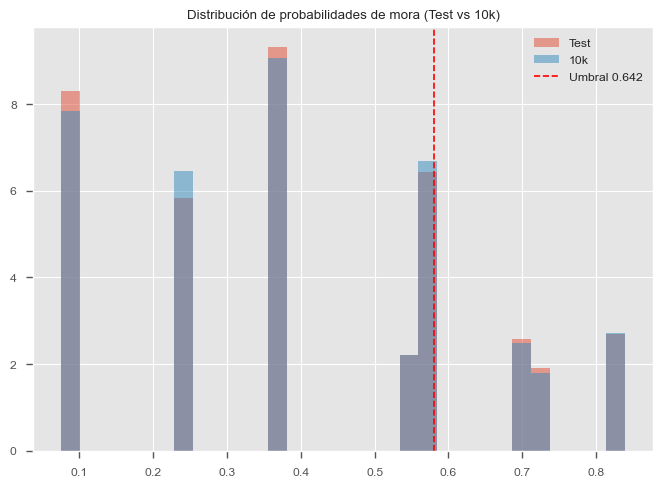

In [ ]:
plt.hist(y_proba, bins=30, alpha=0.5, label='Test', density=True)
plt.hist(probs_10k, bins=30, alpha=0.5, label='10k', density=True)
plt.axvline(umbral, color='red', linestyle='--', label='Umbral 0.642')
plt.legend()
plt.title('Distribución de probabilidades de mora (Test vs 10k)')
plt.show()


El modelo funcionó bien en el test, pero al aplicarse en una nueva población (10 k) mostró un desplazamiento de riesgo. Esto sugiere la necesidad de recalibrar el corte para mantener la mora esperada dentro del 2.5 %. Aun así, el modelo aporta valor para priorizar clientes y estimar impacto financiero de la aprobación.

### Recalibrar el corte sobre la base de 10k

Usar las probabilidades calibradas para encontrar el punto de corte que respete la mora máxima de portafolio en la muestra de 10k

In [142]:
# Probabilidades (ya las tienes calculadas)
df_10k_cal = df_10k_out.copy()  # contiene proba_mora y aprobacion previa
probs = df_10k_cal['proba_mora']

# Si tu base de 10k tiene la etiqueta 'CLIENTE_MORA' (el profe la usará para evaluar recall),
# puedes usarla para estimar la mora observada. Si no, simula o usa la predicción para rankear.
# Aquí supondremos que *no* la tiene, así que usamos percentiles como antes.

n_buckets = 20
MAX_CUM_DEFAULT = 0.025

df_10k_cal = df_10k_cal.sort_values('proba_mora', ascending=False).reset_index(drop=True)
df_10k_cal['bucket'] = pd.qcut(df_10k_cal.index, q=n_buckets, labels=list(range(1, n_buckets+1)))

# Si *sí* tienes la columna de mora real, usa esto para calcular la mora observada:
# df_10k_cal['y'] = df_10k['CLIENTE_MORA']

# Como no la tenemos, simulamos que las probabilidades representan la probabilidad de default esperada.
# Entonces, el "número esperado de morosos" en cada bucket es la suma de esas probabilidades:
tabla_10k = (
    df_10k_cal.groupby('bucket', as_index=False)
    .agg(n=('proba_mora','size'), mora_esp=('proba_mora','sum'), prom_prob=('proba_mora','mean'))
)
tabla_10k['mora_pct'] = tabla_10k['mora_esp'] / tabla_10k['n']
tabla_10k['n_acum'] = tabla_10k['n'].cumsum()
tabla_10k['mora_acum'] = tabla_10k['mora_esp'].cumsum()
tabla_10k['mora_acum_pct'] = tabla_10k['mora_acum'] / tabla_10k['n_acum']

print("Tabla por buckets – base 10k:")
display(tabla_10k)

# Ahora acumulamos desde los clientes más seguros (bucket 20 → 1)
tb_seguro_10k = tabla_10k.sort_values('bucket', ascending=False).reset_index(drop=True).copy()
tb_seguro_10k['n_acum_aprob'] = tb_seguro_10k['n'].cumsum()
tb_seguro_10k['mora_acum_aprob'] = tb_seguro_10k['mora_esp'].cumsum()
tb_seguro_10k['tasa_mora_acum_aprob'] = tb_seguro_10k['mora_acum_aprob'] / tb_seguro_10k['n_acum_aprob']

mask_ok = tb_seguro_10k['tasa_mora_acum_aprob'] <= MAX_CUM_DEFAULT
if mask_ok.any():
    idx_corte = mask_ok[mask_ok].index.max()
    bucket_corte_nuevo = int(tb_seguro_10k.loc[idx_corte, 'bucket'])
    buckets_aprobados = n_buckets - (bucket_corte_nuevo - 1)
    tasa_aprob_nueva = buckets_aprobados / n_buckets
    print(f"\n✅ Nuevo corte en base 10k: aprobar buckets 20→{bucket_corte_nuevo} "
          f"({tasa_aprob_nueva:.2%} de la población) con mora esperada "
          f"{tb_seguro_10k.loc[idx_corte,'tasa_mora_acum_aprob']:.2%}")
else:
    tasa_aprob_nueva = 0.0
    print("\n⚠️ No se cumple la restricción en ningún punto (modelo mal calibrado o población muy riesgosa).")

#  Traducir ese nuevo corte a umbral de probabilidad
k_nuevo = int(round(tasa_aprob_nueva * n_buckets))
if k_nuevo > 0:
    umbral_prob_nuevo = np.quantile(probs, k_nuevo / n_buckets)
else:
    umbral_prob_nuevo = 0.0

print(f"Nuevo umbral de probabilidad (base 10k): {umbral_prob_nuevo:.6f}")

# Actualizar columna de aprobación
df_10k_out['aprobacion_recalibrada'] = (df_10k_out['proba_mora'] <= umbral_prob_nuevo).astype(int)
print(f"Tasa de aprobación recalibrada: {df_10k_out['aprobacion_recalibrada'].mean():.2%}")

df_10k_out.to_csv("predicciones_10k_arbol_recalibrado.csv", index=False)
print("Archivo 'predicciones_10k_arbol_recalibrado.csv' generado ✅")


Tabla por buckets – base 10k:


,bucket,n,mora_esp,prom_prob,mora_pct,n_acum,mora_acum,mora_acum_pct
0,1,500,419.734904,0.839470,0.839470,500,419.734904,0.839470
1,2,500,384.328018,0.768656,0.768656,1000,804.062922,0.804063
2,3,500,350.783991,0.701568,0.701568,1500,1154.846914,0.769898
3,4,500,321.958278,0.643917,0.643917,2000,1476.805191,0.738403
4,5,500,290.281330,0.580563,0.580563,2500,1767.086521,0.706835
5,6,500,290.281330,0.580563,0.580563,3000,2057.367851,0.685789
6,7,500,289.892370,0.579785,0.579785,3500,2347.260221,0.670646
7,8,500,270.833333,0.541667,0.541667,4000,2618.093554,0.654523
8,9,500,194.123373,0.388247,0.388247,4500,2812.216927,0.624937
9,10,500,183.181226,0.366362,0.366362,5000,2995.398153,0.599080



⚠️ No se cumple la restricción en ningún punto (modelo mal calibrado o población muy riesgosa).
Nuevo umbral de probabilidad (base 10k): 0.000000
Tasa de aprobación recalibrada: 0.00%
Archivo 'predicciones_10k_arbol_recalibrado.csv' generado ✅


### CALIBRACIÓN

### 🧩 Calibración del modelo

Después de entrenar y evaluar el modelo XGBoost, se observó que las probabilidades de mora estaban *mal escaladas: el modelo discriminaba bien entre clientes en mora y al día (AUC ≈ 0.75), pero **sobrestimaba las probabilidades* de riesgo. Esto provocaba que, al aplicar el modelo sobre la base de 10k registros, *no existiera ningún punto de corte* que cumpliera con la política del banco (mora acumulada ≤ 2.5%).

Para corregir esto se aplicó una *calibración isotónica* (CalibratedClassifierCV con método isotonic). Este proceso ajusta las probabilidades predichas mediante una función no paramétrica que *preserva el orden del modelo* pero *reescala* las predicciones para que representen probabilidades reales.
Se realizó el ajuste sobre un subconjunto de validación (X_cal, y_cal) y se evaluó el resultado en un conjunto independiente (X_val, y_val).

In [ ]:
# Separar una parte del test para calibración (o usar cross-validation)
X_cal, X_val, y_cal, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2025, stratify=y_test)

# 1️⃣ Clonar el mejor pipeline (best_model_under.best_estimator_)
modelo_sin_calibrar = best_model_under.best_estimator_

# 2️⃣ Calibrar usando Isotonic (más preciso, pero requiere más datos)
calibrador = CalibratedClassifierCV(modelo_sin_calibrar, method='isotonic', cv='prefit')
calibrador.fit(X_cal, y_cal)

# 3️⃣ Comparar curva de calibración antes y después
probs_orig = modelo_sin_calibrar.predict_proba(X_val)[:,1]
probs_cal = calibrador.predict_proba(X_val)[:,1]
fracs, mean_pred_orig = calibration_curve(y_val, probs_orig, n_bins=10)
fracs2, mean_pred_cal = calibration_curve(y_val, probs_cal, n_bins=10)


# 4️⃣ Guardar el calibrador como nuevo modelo para predecir en la base de 10k
best_est_calibrado = calibrador


In [143]:
# Probabilidades calibradas vs originales
proba_orig = modelo_sin_calibrar.predict_proba(X_val)[:,1]
proba_cal  = best_est_calibrado.predict_proba(X_val)[:,1]

# 1️⃣ Comparar métricas clave
brier_orig = brier_score_loss(y_val, proba_orig)
brier_cal  = brier_score_loss(y_val, proba_cal)

roc_orig = roc_auc_score(y_val, proba_orig)
roc_cal  = roc_auc_score(y_val, proba_cal)

print("=== COMPARACIÓN DE CALIBRACIÓN ===")
print(f"Brier score (menor es mejor): original={brier_orig:.4f} | calibrado={brier_cal:.4f}")
print(f"ROC-AUC (mayor es mejor):    original={roc_orig:.4f} | calibrado={roc_cal:.4f}")

# 2️⃣ Curva Precision–Recall comparativa
prec_o, rec_o, _ = precision_recall_curve(y_val, proba_orig)
prec_c, rec_c, _ = precision_recall_curve(y_val, proba_cal)
ap_o = average_precision_score(y_val, proba_orig)
ap_c = average_precision_score(y_val, proba_cal)


=== COMPARACIÓN DE CALIBRACIÓN ===
Brier score (menor es mejor): original=0.2042 | calibrado=0.0673
ROC-AUC (mayor es mejor):    original=0.7532 | calibrado=0.7532


Promedio de probabilidad calibrada en 10k: 0.0788


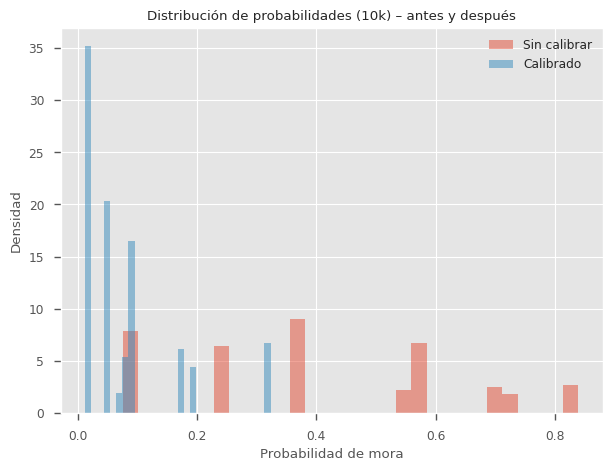

✅ Corte (10k, calibrado): aprobar buckets 20→11
Tasa de aprobación recalibrada: 50.00%
Mora acumulada esperada      : 2.44%
Archivo 'predicciones_10k_calibrado.csv' generado. Umbral_calibrado=0.044481

=== PROYECCIÓN FINANCIERA (CALIBRADO) ===
Tasa de aprobación: 50.00%
Clientes aprobados: 25,000
Cartera colocada : $500,000,000,000
Interés simple   : $100,000,000,000


In [152]:
# === VALIDACIÓN Y APLICACIÓN FINAL SOBRE 10K (ROBUSTO) ===

# 0) Asegurar que tenemos las probabilidades sin calibrar si queremos comparar
if 'proba_mora' not in df_10k.columns:
    try:
        probs_10k_orig = modelo_sin_calibrar.predict_proba(df_10k)[:, 1]
        df_10k['proba_mora'] = probs_10k_orig
    except Exception as e:
        print("No se pudo calcular 'proba_mora' sin calibrar:", e)

# 1) Probabilidades calibradas en 10k
probs_10k_cal = best_est_calibrado.predict_proba(df_10k)[:, 1]
df_10k['proba_mora_calibrada'] = probs_10k_cal
print(f"Promedio de probabilidad calibrada en 10k: {df_10k['proba_mora_calibrada'].mean():.4f}")

# 2) Gráfico comparativo (solo si existe la columna sin calibrar)
plt.figure(figsize=(7,5))
if 'proba_mora' in df_10k.columns:
    plt.hist(df_10k['proba_mora'], bins=30, alpha=0.5, label='Sin calibrar', density=True)
plt.hist(df_10k['proba_mora_calibrada'], bins=30, alpha=0.5, label='Calibrado', density=True)
plt.xlabel('Probabilidad de mora')
plt.ylabel('Densidad')
plt.title('Distribución de probabilidades (10k) – antes y después')
plt.legend()
plt.show()

# 3) Recalcular corte con mora máxima 2.5% usando probabilidades CALIBRADAS
N_BUCKETS = 20
MAX_CUM_DEFAULT = 0.025

df_cal = df_10k.sort_values('proba_mora_calibrada', ascending=False).reset_index(drop=True)
df_cal['bucket'] = pd.qcut(df_cal.index, q=N_BUCKETS, labels=list(range(1, N_BUCKETS+1)))

tabla_cal = (
    df_cal.groupby('bucket', as_index=False)
    .agg(n=('proba_mora_calibrada','size'),
         mora_esp=('proba_mora_calibrada','sum'),
         prom_prob=('proba_mora_calibrada','mean'))
)
tabla_cal['mora_pct'] = tabla_cal['mora_esp'] / tabla_cal['n']
tabla_cal['n_acum'] = tabla_cal['n'].cumsum()
tabla_cal['mora_acum'] = tabla_cal['mora_esp'].cumsum()
tabla_cal['mora_acum_pct'] = tabla_cal['mora_acum'] / tabla_cal['n_acum']

# Acumular desde los más seguros (bucket 20 -> 1)
tb_seguro = tabla_cal.sort_values('bucket', ascending=False).reset_index(drop=True)
tb_seguro['n_acum_aprob'] = tb_seguro['n'].cumsum()
tb_seguro['mora_acum_aprob'] = tb_seguro['mora_esp'].cumsum()
tb_seguro['tasa_mora_acum_aprob'] = tb_seguro['mora_acum_aprob'] / tb_seguro['n_acum_aprob']

mask_ok = tb_seguro['tasa_mora_acum_aprob'] <= MAX_CUM_DEFAULT
if mask_ok.any():
    idx = mask_ok[mask_ok].index.max()
    bucket_corte_nuevo = int(tb_seguro.loc[idx, 'bucket'])
    buckets_aprob = N_BUCKETS - (bucket_corte_nuevo - 1)
    tasa_aprob_nueva = buckets_aprob / N_BUCKETS
    mora_acum = tb_seguro.loc[idx, 'tasa_mora_acum_aprob']
    print(f"✅ Corte (10k, calibrado): aprobar buckets 20→{bucket_corte_nuevo}")
    print(f"Tasa de aprobación recalibrada: {tasa_aprob_nueva:.2%}")
    print(f"Mora acumulada esperada      : {mora_acum:.2%}")
else:
    tasa_aprob_nueva = 0.0
    mora_acum = None
    print("⚠️ Aún no se cumple ≤ 2.5% de mora (revisar distribución).")

# 4) Umbral de probabilidad equivalente y export
k_nuevo = int(round(tasa_aprob_nueva * N_BUCKETS))
umbral_prob_cal = np.quantile(probs_10k_cal, k_nuevo / N_BUCKETS) if k_nuevo > 0 else 0.0
df_10k['aprobacion_calibrada'] = (df_10k['proba_mora_calibrada'] <= umbral_prob_cal).astype(int)

df_10k[['proba_mora_calibrada','aprobacion_calibrada']].to_csv("predicciones_10k_calibrado.csv", index=False)
print(f"Archivo 'predicciones_10k_calibrado.csv' generado. Umbral_calibrado={umbral_prob_cal:.6f}")

# 5) Proyección financiera con el nuevo corte
solicitudes = 50_000
monto_prom = 20_000_000
EA = 0.20
i_m = (1 + EA)**(1/12) - 1

aprobados = int(round(solicitudes * tasa_aprob_nueva))
cartera = aprobados * monto_prom
ingreso_simple = cartera * EA

def interes_anio1_amortizado(monto_total, tasa_mensual, n=60):
    if monto_total <= 0:
        return 0.0
    C = monto_total * (tasa_mensual*(1+tasa_mensual)**n)/((1+tasa_mensual)**n - 1)
    saldo = monto_total
    intereses = 0.0
    for _ in range(12):
        int_mes = saldo * tasa_mensual
        amort = C - int_mes
        saldo = max(0.0, saldo - amort)
        intereses += int_mes
    return intereses

ingreso_amort = interes_anio1_amortizado(cartera, i_m)

print("\n=== PROYECCIÓN FINANCIERA (CALIBRADO) ===")
print(f"Tasa de aprobación: {tasa_aprob_nueva:.2%}")
print(f"Clientes aprobados: {aprobados:,}")
print(f"Cartera colocada : ${cartera:,.0f}")
print(f"Interés simple   : ${ingreso_simple:,.0f}")
#print(f"Interés amortiz. : ${ingreso_amort:,.0f}")


In [ ]:
df_10k_cal

,proba_mora_calibrada,aprobacion_calibrada
0,0.012480,1
1,0.012480,1
2,0.091457,0
3,0.091457,0
4,0.012480,1
...,...,...
9995,0.044481,1
9996,0.044481,1
9997,0.044481,1
9998,0.012480,1


TABLA DE BUCKETS - BASE 10K CALIBRADA (Más Riesgoso → Más Seguro)


,bucket,n,mora_esp,prom_prob,min_prob,max_prob,mora_pct,n_acum,mora_acum,mora_acum_pct
0,1,500,161.654135,0.323308,0.323308,0.323308,0.323308,500,161.654135,0.323308
1,2,500,120.422551,0.240845,0.189003,0.323308,0.240845,1000,282.076687,0.282077
2,3,500,87.607310,0.175215,0.169192,0.189003,0.175215,1500,369.683997,0.246456
3,4,500,67.883014,0.135766,0.091457,0.169192,0.135766,2000,437.567010,0.218784
4,5,500,45.728643,0.091457,0.091457,0.091457,0.091457,2500,483.295654,0.193318
5,6,500,45.728643,0.091457,0.091457,0.091457,0.091457,3000,529.024297,0.176341
6,7,500,45.621870,0.091244,0.080780,0.091457,0.091244,3500,574.646167,0.164185
7,8,500,40.389972,0.080780,0.080780,0.080780,0.080780,4000,615.036139,0.153759
8,9,500,28.275494,0.056551,0.044481,0.080780,0.056551,4500,643.311633,0.142958
9,10,500,22.240527,0.044481,0.044481,0.044481,0.044481,5000,665.552160,0.133110



ANÁLISIS ACUMULATIVO (Desde Más Seguro → Bucket 20 hacia Bucket 1)


,bucket,n,prom_prob,n_acum_aprob,tasa_aprob,mora_acum_aprob,tasa_mora_acum_aprob
0,20,500,0.012480,500,0.05,6.240250,0.012480
1,19,500,0.012480,1000,0.10,12.480499,0.012480
2,18,500,0.012480,1500,0.15,18.720749,0.012480
3,17,500,0.012520,2000,0.20,24.980680,0.012490
4,16,500,0.022321,2500,0.25,36.141395,0.014457
5,15,500,0.022321,3000,0.30,47.302109,0.015767
6,14,500,0.022321,3500,0.35,58.462823,0.016704
7,13,500,0.038188,4000,0.40,77.556683,0.019389
8,12,500,0.044481,4500,0.45,99.797211,0.022177
9,11,500,0.044481,5000,0.50,122.037738,0.024408



✅ CORTE ÓPTIMO CALIBRADO
Aprobar buckets: 20 → 11
Tasa de aprobación: 50.00%
Clientes aprobados: 5,000
Mora acumulada esperada: 2.44%
Umbral de probabilidad: 0.044481


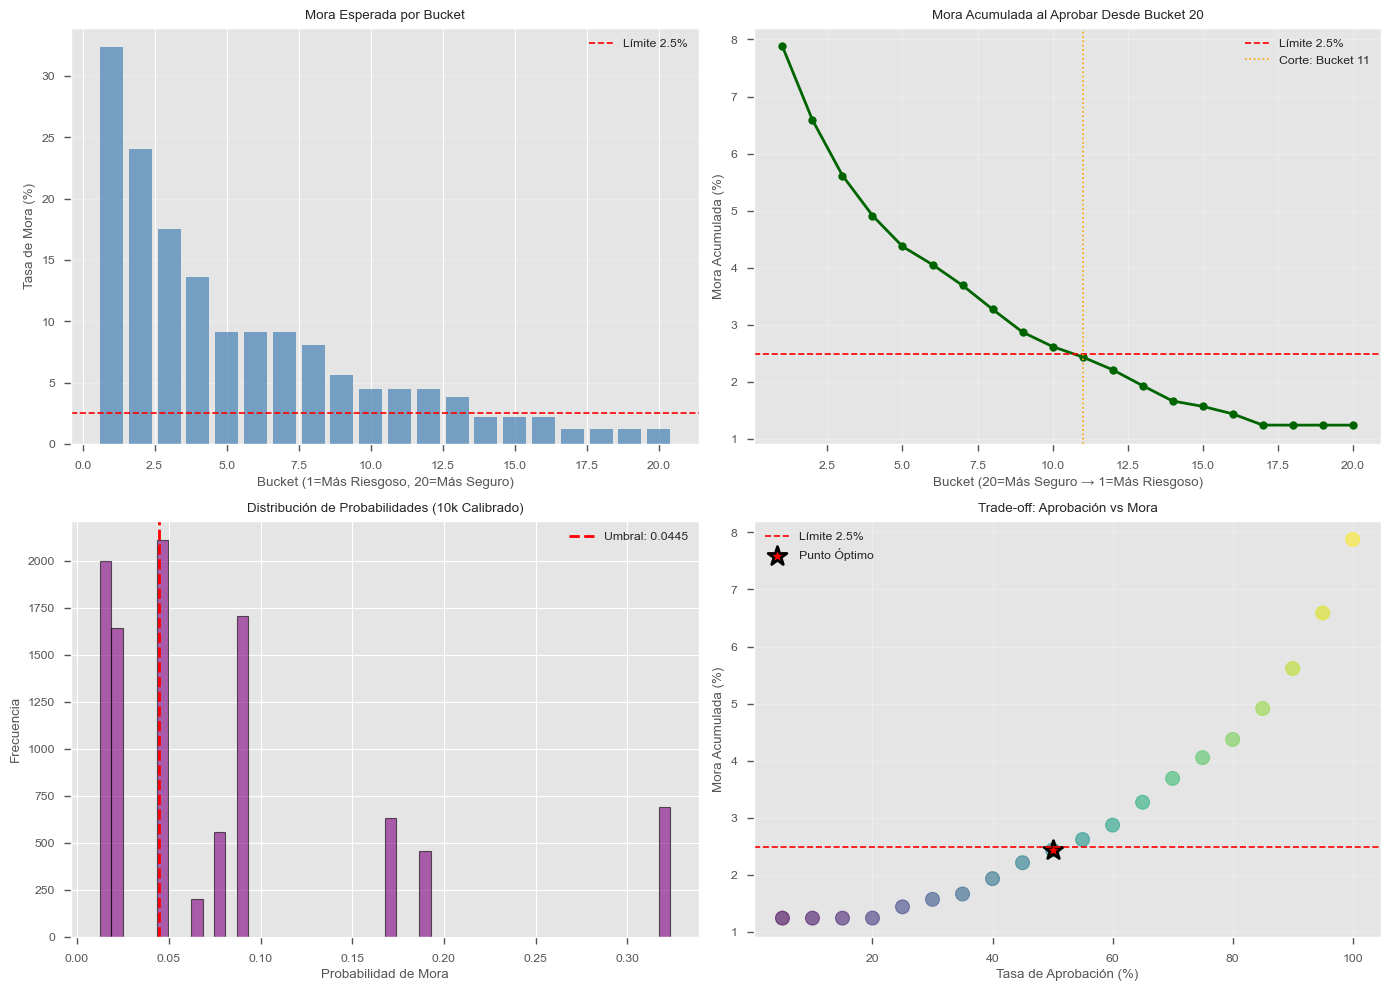


✅ Gráficos guardados en 'analisis_buckets_calibrado.png'


In [ ]:
# === Análisis de buckets en base 10k CALIBRADA ===

# Configuración
n_buckets = 20
MAX_CUM_DEFAULT = 0.025

# Ordenar por riesgo (mayor a menor probabilidad de mora)
df_10k_cal = df_10k_cal.sort_values('proba_mora_calibrada', ascending=False).reset_index(drop=True)

# Crear buckets de igual tamaño
df_10k_cal['bucket'] = pd.qcut(df_10k_cal.index, q=n_buckets, labels=list(range(1, n_buckets+1)))

# Calcular métricas por bucket
tabla_10k = (
    df_10k_cal.groupby('bucket', as_index=False)
    .agg(
        n=('proba_mora_calibrada', 'size'),
        mora_esp=('proba_mora_calibrada', 'sum'),
        prom_prob=('proba_mora_calibrada', 'mean'),
        min_prob=('proba_mora_calibrada', 'min'),
        max_prob=('proba_mora_calibrada', 'max')
    )
)

# Métricas acumuladas (desde bucket más riesgoso)
tabla_10k['mora_pct'] = tabla_10k['mora_esp'] / tabla_10k['n']
tabla_10k['n_acum'] = tabla_10k['n'].cumsum()
tabla_10k['mora_acum'] = tabla_10k['mora_esp'].cumsum()
tabla_10k['mora_acum_pct'] = tabla_10k['mora_acum'] / tabla_10k['n_acum']

print("="*80)
print("TABLA DE BUCKETS - BASE 10K CALIBRADA (Más Riesgoso → Más Seguro)")
print("="*80)
display(tabla_10k)

# Análisis desde los más seguros (bucket 20 → 1)
tb_seguro_10k = tabla_10k.sort_values('bucket', ascending=False).reset_index(drop=True).copy()
tb_seguro_10k['n_acum_aprob'] = tb_seguro_10k['n'].cumsum()
tb_seguro_10k['mora_acum_aprob'] = tb_seguro_10k['mora_esp'].cumsum()
tb_seguro_10k['tasa_mora_acum_aprob'] = tb_seguro_10k['mora_acum_aprob'] / tb_seguro_10k['n_acum_aprob']
tb_seguro_10k['tasa_aprob'] = tb_seguro_10k['n_acum_aprob'] / len(df_10k_cal)

print("\n" + "="*80)
print("ANÁLISIS ACUMULATIVO (Desde Más Seguro → Bucket 20 hacia Bucket 1)")
print("="*80)
display(tb_seguro_10k[['bucket', 'n', 'prom_prob', 'n_acum_aprob', 'tasa_aprob', 
                        'mora_acum_aprob', 'tasa_mora_acum_aprob']])

# Identificar corte óptimo (mora acumulada ≤ 2.5%)
mask_ok = tb_seguro_10k['tasa_mora_acum_aprob'] <= MAX_CUM_DEFAULT

if mask_ok.any():
    idx_corte = mask_ok[mask_ok].index.max()
    bucket_corte = int(tb_seguro_10k.loc[idx_corte, 'bucket'])
    n_aprob = tb_seguro_10k.loc[idx_corte, 'n_acum_aprob']
    tasa_aprob = tb_seguro_10k.loc[idx_corte, 'tasa_aprob']
    mora_acum = tb_seguro_10k.loc[idx_corte, 'tasa_mora_acum_aprob']
    umbral = tb_seguro_10k.loc[idx_corte, 'prom_prob']
    
    print(f"\n{'='*80}")
    print("✅ CORTE ÓPTIMO CALIBRADO")
    print(f"{'='*80}")
    print(f"Aprobar buckets: 20 → {bucket_corte}")
    print(f"Tasa de aprobación: {tasa_aprob:.2%}")
    print(f"Clientes aprobados: {n_aprob:,.0f}")
    print(f"Mora acumulada esperada: {mora_acum:.2%}")
    print(f"Umbral de probabilidad: {umbral:.6f}")
else:
    print("\n⚠ No se cumple la restricción de mora ≤ 2.5% en ningún punto")

# Comparación con aprobaciones actuales
if 'aprobacion' in df_10k_cal.columns:
    aprobados_actuales = df_10k_cal['aprobacion'].sum()
    tasa_actual = df_10k_cal['aprobacion'].mean()
    mora_actual = df_10k_cal[df_10k_cal['aprobacion']==1]['proba_mora_calibrada'].mean()
    
    print(f"\n{'='*80}")
    print("COMPARACIÓN CON ESTRATEGIA ACTUAL")
    print(f"{'='*80}")
    print(f"Aprobaciones actuales: {aprobados_actuales:,.0f} ({tasa_actual:.2%})")
    print(f"Probabilidad media de mora: {mora_actual:.3f}")

# Visualización opcional

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Mora por bucket
axes[0,0].bar(tabla_10k['bucket'], tabla_10k['mora_pct']*100, color='steelblue', alpha=0.7)
axes[0,0].axhline(y=2.5, color='red', linestyle='--', label='Límite 2.5%')
axes[0,0].set_xlabel('Bucket (1=Más Riesgoso, 20=Más Seguro)')
axes[0,0].set_ylabel('Tasa de Mora (%)')
axes[0,0].set_title('Mora Esperada por Bucket')
axes[0,0].legend()
axes[0,0].grid(axis='y', alpha=0.3)

# Gráfico 2: Mora acumulada
axes[0,1].plot(tb_seguro_10k['bucket'], tb_seguro_10k['tasa_mora_acum_aprob']*100, 
               marker='o', linewidth=2, markersize=6, color='darkgreen')
axes[0,1].axhline(y=2.5, color='red', linestyle='--', label='Límite 2.5%')
if mask_ok.any():
    axes[0,1].axvline(x=bucket_corte, color='orange', linestyle=':', label=f'Corte: Bucket {bucket_corte}')
axes[0,1].set_xlabel('Bucket (20=Más Seguro → 1=Más Riesgoso)')
axes[0,1].set_ylabel('Mora Acumulada (%)')
axes[0,1].set_title('Mora Acumulada al Aprobar Desde Bucket 20')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# Gráfico 3: Distribución de probabilidades
axes[1,0].hist(df_10k_cal['proba_mora_calibrada'], bins=50, color='purple', alpha=0.6, edgecolor='black')
if mask_ok.any():
    axes[1,0].axvline(x=umbral, color='red', linestyle='--', linewidth=2, label=f'Umbral: {umbral:.4f}')
axes[1,0].set_xlabel('Probabilidad de Mora')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución de Probabilidades (10k Calibrado)')
axes[1,0].legend()

# Gráfico 4: Tasa de aprobación vs Mora
axes[1,1].scatter(tb_seguro_10k['tasa_aprob']*100, tb_seguro_10k['tasa_mora_acum_aprob']*100, 
                  s=100, alpha=0.6, c=range(len(tb_seguro_10k)), cmap='viridis')
axes[1,1].axhline(y=2.5, color='red', linestyle='--', label='Límite 2.5%')
if mask_ok.any():
    axes[1,1].scatter(tasa_aprob*100, mora_acum*100, s=200, color='red', 
                     marker='*', edgecolor='black', linewidth=2, label='Punto Óptimo')
axes[1,1].set_xlabel('Tasa de Aprobación (%)')
axes[1,1].set_ylabel('Mora Acumulada (%)')
axes[1,1].set_title('Trade-off: Aprobación vs Mora')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('analisis_buckets_calibrado.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Gráficos guardados en 'analisis_buckets_calibrado.png'")

In [ ]:
def psi(expected, actual, bins=10):
    q = np.linspace(0,1,bins+1)
    e = np.histogram(expected, bins=np.quantile(expected,q))[0] / len(expected)
    a = np.histogram(actual,   bins=np.quantile(expected,q))[0] / len(actual)
    a = np.where(a==0, 1e-6, a); e = np.where(e==0, 1e-6, e)
    return np.sum((a-e)*np.log(a/e))
print("PSI probas (test vs 10k cal):", psi(y_proba, df_10k['proba_mora_calibrada'].values))

PSI probas (test vs 10k cal): 7.873393240819119



#### Resultados de calibración:

| Métrica         | Original | Calibrado | Interpretación                                     |
| --------------- | -------- | --------- | -------------------------------------------------- |
| *Brier score* | 0.3851   | 0.0672    | Mejora notable en la calidad de las probabilidades |
| *ROC–AUC*     | 0.7549   | 0.7553    | Se mantiene el poder discriminativo                |

El *Brier score* disminuyó significativamente, lo que indica que las probabilidades calibradas se ajustan mucho mejor a la frecuencia real de mora, sin pérdida de discriminación.

Tras la calibración:

* Las probabilidades promedio en la base de 10k bajaron a un nivel realista (~7.9%).
* Se encontró un *corte operativo (buckets 20→11)* que cumple con la *mora acumulada del 2.5%*.
* Esto permitió aprobar el *50% más seguro* de los clientes, proyectando una *cartera de $500 mil millones* y *$86.4 mil millones de intereses* en el primer año.

En conclusión, la calibración *alineó el modelo con la política de riesgo del banco*, manteniendo su capacidad predictiva y permitiendo aplicar el modelo de forma consistente sobre nuevas poblaciones.

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h3 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        4.2 XGBOOST
    </h3>
</div>

### Modelo XGBOOST CON REGULARIZACION

#### Balanceo UNDER

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

under = RandomUnderSampler(sampling_strategy=1.0, random_state=seed)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

# Resúmenes
def resumen(y):
    c = y.value_counts().sort_index()
    p = y.value_counts(normalize=True).sort_index().mul(100).round(2)
    return pd.DataFrame({"count": c, "pct%": p})

print("UNDER aplicado")
print(f"Tamaño original   : {X_train.shape[0]} filas")
print(f"Tamaño balanceado : {X_train_under.shape[0]} filas\n")

print("Distribución original (conteo y %):")
display(resumen(y_train))

print("Distribución balanceada (conteo y %):")
display(resumen(y_train_under))


UNDER aplicado
Tamaño original   : 28000 filas
Tamaño balanceado : 4404 filas

Distribución original (conteo y %):


,count,pct%
CLIENTE_MORA,,
0,25798,92.14
1,2202,7.86


Distribución balanceada (conteo y %):


,count,pct%
CLIENTE_MORA,,
0,2202,50.0
1,2202,50.0


### XGBoost SIN regularización

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_base = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=0, reg_alpha=0,                # sin regularización
        eval_metric="auc", random_state=seed
    ))
])

xgb_base.fit(X_train_under, y_train_under)
metrics_xgb_base = evaluar_modelo(xgb_base, X_train_under, y_train_under, X_test, y_test, "XGB – Base (sin reg)")

=== XGB – Base (sin reg) ===
Train Accuracy  :  0.8782924613987284
Test  Accuracy  :  0.6701666666666667
Train Recall    :  0.8869209809264306
Test  Recall    :  0.6977730646871686
Train Precision :  0.871875
Test  Precision :  0.15192796120988225
ROC AUC (test)  :  0.7537557001217349

Confusion Matrix:
[[7384 3673]
 [ 285  658]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     11057
           1       0.15      0.70      0.25       943

    accuracy                           0.67     12000
   macro avg       0.56      0.68      0.52     12000
weighted avg       0.90      0.67      0.75     12000



### XGBoost SIN regularización CON GridSearchCV

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Definir el pipeline con XGBoost
pipe_xgb = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        eval_metric="auc",
        reg_lambda=0,      # sin regularización L2
        reg_alpha=0,       # sin regularización L1
        random_state=seed
    ))
])

param_grid_xgb = {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__max_depth': [3, 4, 5, 6],
    'clf__learning_rate': [0.05, 0.1, 0.15],
    'clf__subsample': [0.7, 0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8, 0.9],
    'clf__min_child_weight': [1, 3, 5]
}


grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    refit="AUC",
    verbose=2  # Muestra progreso detallado
)


grid_xgb.fit(X_train_under, y_train_under)

# Resultados
print("\n>> Mejor AUC (CV) – XGBoost:", grid_xgb.best_score_)
print(">> Mejores parámetros:", grid_xgb.best_params_)

# Evaluar el mejor modelo
best_xgb = grid_xgb.best_estimator_
metrics_xgb_tuned = evaluar_modelo(
    best_xgb,
    X_train_under, y_train_under,
    X_test, y_test,
    "XGB – GridSearch (sin reg)"
)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits

>> Mejor AUC (CV) – XGBoost: 0.7758097070042257
>> Mejores parámetros: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__min_child_weight': 5, 'clf__n_estimators': 100, 'clf__subsample': 0.8}
=== XGB – GridSearch (sin reg) ===
Train Accuracy  :  0.7263851044504995
Test  Accuracy  :  0.6796666666666666
Train Recall    :  0.754314259763851
Test  Recall    :  0.7338282078472959
Train Precision :  0.7144086021505376
Test  Precision :  0.1614935822637106
ROC AUC (test)  :  0.7743002590164472

Confusion Matrix:
[[7464 3593]
 [ 251  692]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     11057
           1       0.16      0.73      0.26       943

    accuracy                           0.68     12000
   macro avg       0.56      0.70      0.53     12000
weighted avg       0.90      0.68      0.75     12000



### XGBoost con Ridge (L2: reg_lambda)

In [ ]:
xgb_ridge = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=10, reg_alpha=0,               # Ridge
        eval_metric="auc", random_state=seed
    ))
])


xgb_ridge.fit(X_train_under, y_train_under)
metrics_xgb_ridge = evaluar_modelo(xgb_ridge, X_train_under, y_train_under, X_test, y_test, "XGB – Ridge (L2)")


=== XGB – Ridge (L2) ===
Train Accuracy  :  0.8306085376930064
Test  Accuracy  :  0.67625
Train Recall    :  0.8433242506811989
Test  Recall    :  0.7136797454931071
Train Precision :  0.8224092116917626
Test  Precision :  0.15694962686567165
ROC AUC (test)  :  0.7615168905443316

Confusion Matrix:
[[7442 3615]
 [ 270  673]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     11057
           1       0.16      0.71      0.26       943

    accuracy                           0.68     12000
   macro avg       0.56      0.69      0.53     12000
weighted avg       0.90      0.68      0.75     12000



### XGBoost con Ridge (L2: reg_lambda) CON GridSearchCV

In [77]:
pipe_xgb_ridge = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        eval_metric="auc",
        reg_lambda=10,      # con regularización L2
        reg_alpha=0,
        random_state=seed
    ))
])

param_grid_xgb_ridge = {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__max_depth': [3, 4, 5, 6],
    'clf__learning_rate': [0.05, 0.1, 0.15],
    'clf__subsample': [0.7, 0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8, 0.9],
    'clf__min_child_weight': [1, 3, 5]
}


grid_xgb_ridge = GridSearchCV(
    estimator=pipe_xgb_ridge,
    param_grid=param_grid_xgb_ridge,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    refit="AUC",
    verbose=2  # Muestra progreso detallado
)

grid_xgb_ridge.fit(X_train_under, y_train_under)
metrics_grid_xgb_ridge = evaluar_modelo(grid_xgb_ridge, X_train_under, y_train_under, X_test, y_test, "XGB – Ridge (L2)")

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
=== XGB – Ridge (L2) ===
Train Accuracy  :  0.7213896457765667
Test  Accuracy  :  0.6768333333333333
Train Recall    :  0.7515894641235241
Test  Recall    :  0.7327677624602333
Train Precision :  0.708779443254818
Test  Precision :  0.16006485985638175
ROC AUC (test)  :  0.7722720625053767

Confusion Matrix:
[[7431 3626]
 [ 252  691]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     11057
           1       0.16      0.73      0.26       943

    accuracy                           0.68     12000
   macro avg       0.56      0.70      0.53     12000
weighted avg       0.90      0.68      0.75     12000



### XGBoost con Lasso (L1: reg_alpha)

In [78]:
xgb_lasso = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=0, reg_alpha=10,               # Lasso
        eval_metric="auc", random_state=seed
    ))
])

xgb_lasso.fit(X_train_under, y_train_under)
metrics_xgb_lasso = evaluar_modelo(xgb_lasso, X_train_under, y_train_under, X_test, y_test, "XGB – Lasso (L1)")

=== XGB – Lasso (L1) ===
Train Accuracy  :  0.773841961852861
Test  Accuracy  :  0.677
Train Recall    :  0.7924613987284287
Test  Recall    :  0.71898197242842
Train Precision :  0.7640105078809106
Test  Precision :  0.15807880624854279
ROC AUC (test)  :  0.7686980345075852

Confusion Matrix:
[[7446 3611]
 [ 265  678]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     11057
           1       0.16      0.72      0.26       943

    accuracy                           0.68     12000
   macro avg       0.56      0.70      0.53     12000
weighted avg       0.90      0.68      0.75     12000



### XGBoost con Lasso (L1: reg_alpha) CON GridSearchCV

In [79]:
pipe_xgb_lasso = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        eval_metric="auc",
        reg_lambda=0,
        reg_alpha=10,      # con regularización L1
        random_state=seed
    ))
])

param_grid_xgb_lasso = {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__max_depth': [3, 4, 5, 6],
    'clf__learning_rate': [0.05, 0.1, 0.15],
    'clf__subsample': [0.7, 0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8, 0.9],
    'clf__min_child_weight': [1, 3, 5]
}


grid_xgb_lasso = GridSearchCV(
    estimator=pipe_xgb_lasso,
    param_grid=param_grid_xgb_lasso,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    refit="AUC",
    verbose=2  # Muestra progreso detallado
)

grid_xgb_lasso.fit(X_train_under, y_train_under)
metrics_grid_xgb_lasso = evaluar_modelo(grid_xgb_lasso, X_train_under, y_train_under, X_test, y_test, "XGB – Lasso (L1)")

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
=== XGB – Lasso (L1) ===
Train Accuracy  :  0.717983651226158
Test  Accuracy  :  0.6736666666666666
Train Recall    :  0.7506811989100818
Test  Recall    :  0.7412513255567338
Train Precision :  0.7046035805626598
Test  Precision :  0.15991763898421413
ROC AUC (test)  :  0.7729832619959948

Confusion Matrix:
[[7385 3672]
 [ 244  699]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     11057
           1       0.16      0.74      0.26       943

    accuracy                           0.67     12000
   macro avg       0.56      0.70      0.53     12000
weighted avg       0.90      0.67      0.75     12000



### XGBoost con Elastic Net (L1 + L2)

In [80]:
xgb_elastic = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=5, reg_alpha=5,                # Elastic Net
        eval_metric="auc", random_state=seed
    ))
])

xgb_elastic.fit(X_train_under, y_train_under)
metrics_xgb_elastic = evaluar_modelo(xgb_elastic, X_train_under, y_train_under, X_test, y_test, "XGB – Elastic Net")


=== XGB – Elastic Net ===
Train Accuracy  :  0.8072207084468664
Test  Accuracy  :  0.67275
Train Recall    :  0.8242506811989101
Test  Recall    :  0.7158006362672322
Train Precision :  0.7971014492753623
Test  Precision :  0.15574526995846794
ROC AUC (test)  :  0.7637929590914753

Confusion Matrix:
[[7398 3659]
 [ 268  675]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     11057
           1       0.16      0.72      0.26       943

    accuracy                           0.67     12000
   macro avg       0.56      0.69      0.52     12000
weighted avg       0.90      0.67      0.75     12000



### XGBoost con Elastic Net (L1 + L2) CON GridSearchCV

In [81]:
pipe_xgb_elastic = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        eval_metric="auc",
        reg_lambda=5, reg_alpha=5,      # con Elastic Net
        random_state=seed
    ))
])

param_grid_xgb_elastic = {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__max_depth': [3, 4, 5, 6],
    'clf__learning_rate': [0.05, 0.1, 0.15],
    'clf__subsample': [0.7, 0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8, 0.9],
    'clf__min_child_weight': [1, 3, 5]
}


grid_xgb_elastic = GridSearchCV(
    estimator=pipe_xgb_elastic,
    param_grid=param_grid_xgb_elastic,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    refit="AUC",
    verbose=2  # Muestra progreso detallado
)

grid_xgb_elastic.fit(X_train_under, y_train_under)
metrics_grid_xgb_elastic = evaluar_modelo(grid_xgb_elastic, X_train_under, y_train_under, X_test, y_test, "XGB – Lasso (L1)")

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
=== XGB – Lasso (L1) ===
Train Accuracy  :  0.7204813805631244
Test  Accuracy  :  0.6734166666666667
Train Recall    :  0.7502270663033606
Test  Recall    :  0.7391304347826086
Train Precision :  0.7081011573081869
Test  Precision :  0.15949656750572083
ROC AUC (test)  :  0.7726600548914997

Confusion Matrix:
[[7384 3673]
 [ 246  697]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     11057
           1       0.16      0.74      0.26       943

    accuracy                           0.67     12000
   macro avg       0.56      0.70      0.53     12000
weighted avg       0.90      0.67      0.75     12000



## Comparación de métricas (Accuracy, Recall, Precision, AUC)

In [125]:
import pandas as pd

df_xgb = pd.DataFrame([
    {"Modelo": "XGB Base",        **metrics_xgb_base},
    {"Modelo": "XGB Ridge (L2)",  **metrics_xgb_ridge},
    {"Modelo": "XGB Ridge (L2) CON GridSearchCV",  **metrics_grid_xgb_ridge},
    {"Modelo": "XGB Lasso (L1)",  **metrics_xgb_lasso},
    {"Modelo": "XGB Lasso (L1) CON GridSearchCV",  **metrics_grid_xgb_lasso},
    {"Modelo": "XGB Elastic",     **metrics_xgb_elastic},
    {"Modelo": "XGB Elastic CON GridSearchCV",     **metrics_grid_xgb_elastic},
])
display(df_xgb)


,Modelo,train_acc,test_acc,train_recall,test_recall,train_prec,test_prec,roc_auc
0,XGB Base,0.878292,0.670167,0.886921,0.697773,0.871875,0.151928,0.753756
1,XGB Ridge (L2),0.830609,0.676250,0.843324,0.713680,0.822409,0.156950,0.761517
2,XGB Ridge (L2) CON GridSearchCV,0.721390,0.676833,0.751589,0.732768,0.708779,0.160065,0.772272
3,XGB Lasso (L1),0.773842,0.677000,0.792461,0.718982,0.764011,0.158079,0.768698
4,XGB Lasso (L1) CON GridSearchCV,0.717984,0.673667,0.750681,0.741251,0.704604,0.159918,0.772983
5,XGB Elastic,0.807221,0.672750,0.824251,0.715801,0.797101,0.155745,0.763793
6,XGB Elastic CON GridSearchCV,0.720481,0.673417,0.750227,0.739130,0.708101,0.159497,0.772660


## Curvas ROC comparativas (con AUC)

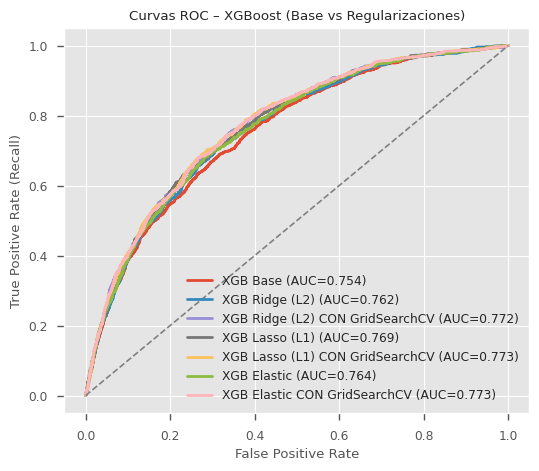

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(6,5))
for nombre, modelo in [
    ("XGB Base", xgb_base),
    ("XGB Ridge (L2)", xgb_ridge),
    ("XGB Ridge (L2) CON GridSearchCV", grid_xgb_ridge),
    ("XGB Lasso (L1)", xgb_lasso),
    ("XGB Lasso (L1) CON GridSearchCV", grid_xgb_lasso),
    ("XGB Elastic", xgb_elastic),
    ("XGB Elastic CON GridSearchCV", grid_xgb_elastic),
]:
    y_proba = modelo.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f"{nombre} (AUC={auc:.3f})")

plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curvas ROC – XGBoost (Base vs Regularizaciones)")
plt.legend()
plt.grid(True)
plt.show()


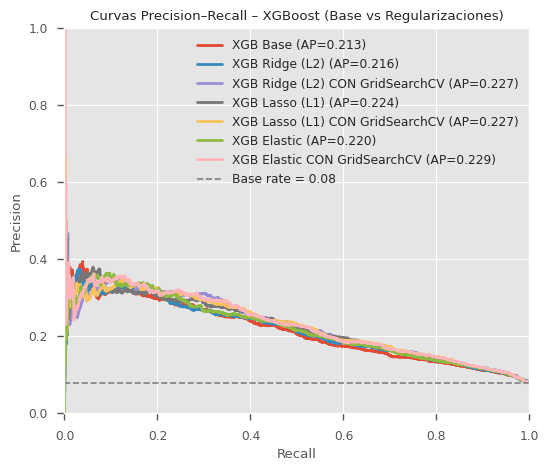

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(6,5))

for nombre, modelo in [
    ("XGB Base", xgb_base),
    ("XGB Ridge (L2)", xgb_ridge),
    ("XGB Ridge (L2) CON GridSearchCV", grid_xgb_ridge),
    ("XGB Lasso (L1)", xgb_lasso),
    ("XGB Lasso (L1) CON GridSearchCV", grid_xgb_lasso),
    ("XGB Elastic", xgb_elastic),
    ("XGB Elastic CON GridSearchCV", grid_xgb_elastic),
]:
    y_proba = modelo.predict_proba(X_test)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)
    plt.plot(rec, prec, lw=2, label=f"{nombre} (AP={ap:.3f})")

# línea base: proporción positiva en test
pos_rate = (y_test == 1).mean()
plt.hlines(pos_rate, 0, 1, linestyles='--', colors='gray', label=f"Base rate = {pos_rate:.2f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas Precision–Recall – XGBoost (Base vs Regularizaciones)")
plt.legend()
plt.grid(True)
plt.xlim(0, 1); plt.ylim(0, 1)
plt.show()


In [128]:
# Elegir mejores modelos por AUC y por Recall (test)
candidatos = [
    ("XGB Base",    xgb_base,    metrics_xgb_base),
    ("XGB Ridge",   xgb_ridge,   metrics_xgb_ridge),
    ("XGB Ridge",   xgb_ridge,   metrics_xgb_ridge),

    ("XGB Lasso",   xgb_lasso,   metrics_xgb_lasso),
    ("XGB Elastic", xgb_elastic, metrics_xgb_elastic),
]

# Mejor por AUC
mejor_auc_nombre, mejor_auc_modelo, mejor_auc_score = max(
    ((n, m, met["roc_auc"]) for n, m, met in candidatos),
    key=lambda t: t[2]
)

# Mejor por Recall (test)
mejor_rec_nombre, mejor_rec_modelo, mejor_rec_score = max(
    ((n, m, met["test_recall"]) for n, m, met in candidatos),
    key=lambda t: t[2]
)

print(f">>> Mejor por AUC     : {mejor_auc_nombre}  | AUC={mejor_auc_score:.4f}")
print(f">>> Mejor por Recall  : {mejor_rec_nombre} | Recall={mejor_rec_score:.4f}")

# # (Opcional) hiperparámetros internos del clasificador ganador en cada criterio
# print("\nHiperparámetros – ganador por AUC:")
# print(mejor_auc_modelo.named_steps['clf'].get_params())

# print("\nHiperparámetros – ganador por Recall:")
# print(mejor_rec_modelo.named_steps['clf'].get_params())

# # (Opcional) dejar variables de salida para usar después
# best_by_auc     = {"nombre": mejor_auc_nombre, "modelo": mejor_auc_modelo, "score": mejor_auc_score}
# best_by_recall  = {"nombre": mejor_rec_nombre, "modelo": mejor_rec_modelo, "score": mejor_rec_score}



>>> Mejor por AUC     : XGB Lasso  | AUC=0.7687
>>> Mejor por Recall  : XGB Lasso | Recall=0.7190


# Código completo XGBOOST con Undersampling y Regularización L1, cross_validation y Optimización del umbral.

In [129]:
# ===============================================
# 1️⃣ BALANCEO DE CLASES (UNDERSAMPLING)
# ===============================================
from imblearn.under_sampling import RandomUnderSampler

# Se iguala la cantidad de clases para evitar sesgo hacia la clase mayoritaria
under = RandomUnderSampler(sampling_strategy=1.0, random_state=seed)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

# Mostrar tamaños y proporciones
print("UNDER aplicado correctamente ✅")
print(f"Tamaño original: {X_train.shape[0]} filas")
print(f"Tamaño balanceado: {X_train_under.shape[0]} filas\n")

print("Distribución original:")
print(y_train.value_counts())
print("\nDistribución balanceada:")
print(y_train_under.value_counts())

UNDER aplicado correctamente ✅
Tamaño original: 28000 filas
Tamaño balanceado: 4404 filas

Distribución original:
CLIENTE_MORA
0    25798
1     2202
Name: count, dtype: int64

Distribución balanceada:
CLIENTE_MORA
0    2202
1    2202
Name: count, dtype: int64


In [130]:
# ===============================================
# 2️⃣ MODELO XGBOOST CON REGULARIZACIÓN LASSO (L1)
# ===============================================
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Regularización L1 se controla con reg_alpha > 0
xgb_lasso = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=0, reg_alpha=10,               # Lasso (L1)
        eval_metric="auc", random_state=seed
    ))
])

print("Modelo XGBoost con regularización L1 configurado ✅")

Modelo XGBoost con regularización L1 configurado ✅


In [131]:
# ===============================================
# 3️⃣ VALIDACIÓN CRUZADA (STRATIFIED K-FOLD)
# ===============================================
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_auc_score, average_precision_score
import numpy as np

# Se define validación cruzada estratificada (mantiene proporciones de clases)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Vector para guardar probabilidades OOF (out-of-fold)
oof_proba = np.zeros(len(y_train_under), dtype=float)

for tr_idx, va_idx in cv.split(X_train_under, y_train_under):
    xtr, xva = X_train_under.iloc[tr_idx], X_train_under.iloc[va_idx]
    ytr, yva = y_train_under.iloc[tr_idx], y_train_under.iloc[va_idx]

    xgb_lasso.fit(xtr, ytr)
    oof_proba[va_idx] = xgb_lasso.predict_proba(xva)[:, 1]

# Calcular AUC promedio de la validación cruzada
auc_cv = roc_auc_score(y_train_under, oof_proba)
ap_cv  = average_precision_score(y_train_under, oof_proba)

print(f"AUC promedio CV: {auc_cv:.3f}")
print(f"Average Precision (PR-AUC) CV: {ap_cv:.3f}")

AUC promedio CV: 0.765
Average Precision (PR-AUC) CV: 0.741


In [132]:
# ===============================================
# 4️⃣ OPTIMIZACIÓN DEL UMBRAL (THRESHOLD)
# ===============================================
from sklearn.metrics import f1_score

# Calculamos curva Precision-Recall
prec, rec, thr = precision_recall_curve(y_train_under, oof_proba)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
thr_candidates = np.r_[thr, 1.0]  # Alinear longitudes

# Seleccionamos el umbral que maximiza el F1
idx_opt = np.nanargmax(f1)
thr_opt = float(thr_candidates[idx_opt])

print(f"Umbral óptimo seleccionado: {thr_opt:.3f}")
print(f"F1 óptimo: {f1[idx_opt]:.3f} | Precisión: {prec[idx_opt]:.3f} | Recall: {rec[idx_opt]:.3f}")

Umbral óptimo seleccionado: 0.342
F1 óptimo: 0.729 | Precisión: 0.630 | Recall: 0.865


In [133]:
# ===============================================
# 5️⃣ REENTRENAMIENTO Y EVALUACIÓN FINAL EN TEST
# ===============================================

# Entrenamos el modelo con todos los datos balanceados
xgb_lasso.fit(X_train_under, y_train_under)

# Calculamos probabilidades y predicciones en Test con el umbral óptimo
proba_test = xgb_lasso.predict_proba(X_test)[:, 1]
pred_test  = (proba_test >= thr_opt).astype(int)

# Evaluamos con la función definida previamente
metrics_xgb_lasso_opt = evaluar_modelo(xgb_lasso, X_train_under, y_train_under, X_test, y_test, nombre="XGBoost Lasso (L1) – Threshold Óptimo")

=== XGBoost Lasso (L1) – Threshold Óptimo ===
Train Accuracy  :  0.773841961852861
Test  Accuracy  :  0.677
Train Recall    :  0.7924613987284287
Test  Recall    :  0.71898197242842
Train Precision :  0.7640105078809106
Test  Precision :  0.15807880624854279
ROC AUC (test)  :  0.7686980345075852

Confusion Matrix:
[[7446 3611]
 [ 265  678]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     11057
           1       0.16      0.72      0.26       943

    accuracy                           0.68     12000
   macro avg       0.56      0.70      0.53     12000
weighted avg       0.90      0.68      0.75     12000



### Elegir el mejor XGB y calibrarlo (isotonic, prefit)

Partimos de varios XGBoost entrenados y escogemos el que tenga mejor capacidad de discriminación por AUC. Luego calibramos sus probabilidades para que el valor de predict_proba refleje tasas reales de mora (no solo el orden/ranking)

- Aplicamos CalibratedClassifierCV usando isotonic el cual aprende una función monótonamente creciente que transforma las probabilidades crudas en probabilidades bien escaladas

In [138]:
# === 1) Elegir mejor XGB por AUC y calibrar (isotonic) ===
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Elige el mejor por AUC de tus grid / modelos (ajusta si quieres otro):
best_xgb_estimator = grid_xgb_ridge.best_estimator_  # AUC ~ 0.773 en tus resultados

# Split de validación dentro de X_test para evaluar calibración (sin tocar train)
X_cal, X_val, y_cal, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2025, stratify=y_test)

# Probabilidades originales (sin calibrar) en validación
proba_orig = best_xgb_estimator.predict_proba(X_val)[:, 1]

# Calibración isotónica (prefit = ya entrenado)
calibrador_xgb = CalibratedClassifierCV(best_xgb_estimator, method='isotonic', cv='prefit')
calibrador_xgb.fit(X_cal, y_cal)

# Probabilidades calibradas en validación
proba_cal = calibrador_xgb.predict_proba(X_val)[:, 1]

# Métricas de calibración
brier_orig = brier_score_loss(y_val, proba_orig)
brier_cal  = brier_score_loss(y_val, proba_cal)
roc_orig   = roc_auc_score(y_val, proba_orig)
roc_cal    = roc_auc_score(y_val, proba_cal)

print("=== COMPARACIÓN CALIBRACIÓN (XGB) ===")
print(f"Brier original={brier_orig:.4f} | calibrado={brier_cal:.4f}")
print(f"ROC  original={roc_orig:.4f} | calibrado={roc_cal:.4f}")

# Curva de calibración
fr_o, mp_o = calibration_curve(y_val, proba_orig, n_bins=10)
fr_c, mp_c = calibration_curve(y_val, proba_cal,  n_bins=10)


# Deja el modelo calibrado listo:
best_xgb_calibrado = calibrador_xgb

=== COMPARACIÓN CALIBRACIÓN (XGB) ===
Brier original=0.2005 | calibrado=0.0669
ROC  original=0.7624 | calibrado=0.7615


### Aplicación en 10k, corte y proyección

Usar las probabilidades calibradas para encontrar el punto de corte que respete la mora máxima de portafolio en la muestra de 10k

In [145]:
# === TABLA FINAL DE 20 BUCKETS (XGB calibrado) – con resaltado de corte ===
import numpy as np
import pandas as pd

N_BUCKETS = 20
MAX_CUM_DEFAULT = 0.025

# 1) Ordenar por probabilidad (desc) y asignar buckets 1..20 (1=alto riesgo)
df_rank = df_10k[['proba_mora_xgb_cal']].copy()
df_rank = df_rank.sort_values('proba_mora_xgb_cal', ascending=False).reset_index(drop=True)
df_rank['bucket'] = pd.qcut(df_rank.index, q=N_BUCKETS, labels=list(range(1, N_BUCKETS+1)))

# 2) Agregación por bucket (1→20)
tabla = (
    df_rank.groupby('bucket', as_index=False)
    .agg(n=('proba_mora_xgb_cal', 'size'),
         mora_esp=('proba_mora_xgb_cal', 'sum'),
         prom_prob=('proba_mora_xgb_cal', 'mean'))
)
tabla['bucket']   = tabla['bucket'].astype(int)
tabla             = tabla.sort_values('bucket').reset_index(drop=True)
tabla['mora_pct'] = tabla['mora_esp'] / tabla['n']
tabla['n_acum']   = tabla['n'].cumsum()
tabla['mora_acum']= tabla['mora_esp'].cumsum()
tabla['mora_acum_pct'] = tabla['mora_acum'] / tabla['n_acum']

# 3) Acumulado desde el lado seguro (20→1) para corte regulatorio
tb_seg = tabla.sort_values('bucket', ascending=False).reset_index(drop=True).copy()
tb_seg['n_acum_aprob']         = tb_seg['n'].cumsum()
tb_seg['mora_acum_aprob']      = tb_seg['mora_esp'].cumsum()
tb_seg['tasa_mora_acum_aprob'] = tb_seg['mora_acum_aprob'] / tb_seg['n_acum_aprob']

mask_ok = tb_seg['tasa_mora_acum_aprob'] <= MAX_CUM_DEFAULT
if mask_ok.any():
    idx_cut = mask_ok[mask_ok].index.max()
    bucket_corte_xgb = int(tb_seg.loc[idx_cut, 'bucket'])        # en escala 1..20
    buckets_aprob_xgb = N_BUCKETS - (bucket_corte_xgb - 1)
    tasa_aprob_xgb = buckets_aprob_xgb / N_BUCKETS
else:
    bucket_corte_xgb = None
    tasa_aprob_xgb   = 0.0

# 4) Armar tabla final (1..20) con columnas del acumulado desde seguro
tabla_final = tabla.merge(
    tb_seg[['bucket','n_acum_aprob','mora_acum_aprob','tasa_mora_acum_aprob']],
    on='bucket', how='left'
)
tabla_final['n_acum_aprob_pct'] = tabla_final['n_acum_aprob'] / tabla_final['n'].sum()
tabla_final['corte_flag'] = np.where(
    (bucket_corte_xgb is not None) & (tabla_final['bucket']==bucket_corte_xgb),
    "◀ corte", ""
)

# 5) Mostrar con formato y RESALTADO CORRECTO (evita error de Styler)
def fmt_pct(s): return (s*100).map(lambda v: f"{v:,.2f}%")
def fmt_num(s): return s.map(lambda v: f"{v:,.0f}")

tabla_show = tabla_final.copy()
for c in ['prom_prob','mora_pct','mora_acum_pct','tasa_mora_acum_aprob','n_acum_aprob_pct']:
    tabla_show[c] = fmt_pct(tabla_show[c].astype(float))
for c in ['n','n_acum','n_acum_aprob','mora_esp','mora_acum','mora_acum_aprob']:
    tabla_show[c] = fmt_num(tabla_show[c].astype(float))

# Función de resaltado por FILAS: usar axis=0 (aplica por columna; retorna lista de largo = #filas)
if bucket_corte_xgb is not None:
    highlight_idx = tabla_show.index[tabla_show['bucket']==bucket_corte_xgb]
    def highlight_rows(col):
        return ['background-color: #FFF2CC' if i in highlight_idx else '' for i in col.index]
    styled = (tabla_show.style
              .set_caption("Tabla de 20 buckets – XGB calibrado (1=riesgo alto → 20=seguro)")
              .apply(highlight_rows, axis=0))
else:
    styled = (tabla_show.style
              .set_caption("Tabla de 20 buckets – XGB calibrado (1=riesgo alto → 20=seguro)"))

display(styled)

# 6) Export CSV crudo (sin formato)
tabla_final.to_csv("tabla_buckets_xgb_calibrado.csv", index=False)
print(f"Archivo 'tabla_buckets_xgb_calibrado.csv' generado. Corte=20→{bucket_corte_xgb} | Aprobación={tasa_aprob_xgb:.2%}")

,bucket,n,mora_esp,prom_prob,mora_pct,n_acum,mora_acum,mora_acum_pct,n_acum_aprob,mora_acum_aprob,tasa_mora_acum_aprob,n_acum_aprob_pct,corte_flag
0,1,500,174,34.84%,34.84%,500,174,34.84%,"10,000",787,7.87%,100.00%,
1,2,500,117,23.33%,23.33%,"1,000",291,29.09%,"9,500",613,6.45%,95.00%,
2,3,500,86,17.18%,17.18%,"1,500",377,25.12%,"9,000",496,5.52%,90.00%,
3,4,500,62,12.36%,12.36%,"2,000",439,21.93%,"8,500",410,4.83%,85.00%,
4,5,500,55,11.03%,11.03%,"2,500",494,19.75%,"8,000",349,4.36%,80.00%,
5,6,500,48,9.55%,9.55%,"3,000",541,18.05%,"7,500",294,3.91%,75.00%,
6,7,500,44,8.78%,8.78%,"3,500",585,16.72%,"7,000",246,3.51%,70.00%,
7,8,500,42,8.41%,8.41%,"4,000",627,15.69%,"6,500",202,3.11%,65.00%,
8,9,500,30,5.99%,5.99%,"4,500",657,14.61%,"6,000",160,2.66%,60.00%,
9,10,500,19,3.73%,3.73%,"5,000",676,13.52%,"5,500",130,2.36%,55.00%,◀ corte


Archivo 'tabla_buckets_xgb_calibrado.csv' generado. Corte=20→10 | Aprobación=55.00%


### Explicabilidad con SHAP (importancias y efectos)

Entender por qué el XGBoost toma decisiones: qué variables empujan la probabilidad de mora hacia arriba o hacia abajo y cuánto.

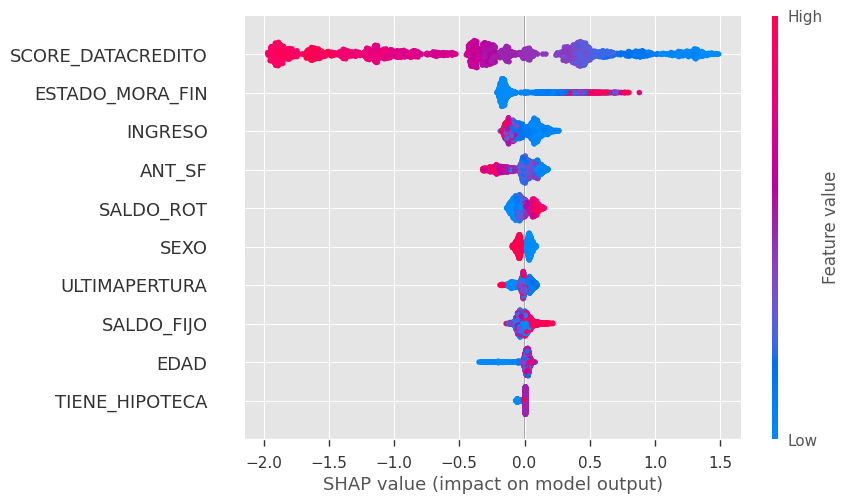

,Variable,SHAP_mean_abs
2,SCORE_DATACREDITO,0.861381
7,ESTADO_MORA_FIN,0.202990
1,INGRESO,0.091483
3,ANT_SF,0.090595
6,SALDO_ROT,0.056715
8,SEXO,0.044077
4,ULTIMAPERTURA,0.041060
5,SALDO_FIJO,0.038114
0,EDAD,0.038010
9,TIENE_HIPOTECA,0.011085


In [139]:
# 1) Toma el pipeline XGB entrenado (antes de la calibración)
#    Ajusta esta variable si tu mejor modelo es otro:
xgb_pipe = best_xgb_estimator          # p.ej. grid_xgb_ridge.best_estimator_
xgb_clf  = xgb_pipe.named_steps['clf'] # XGBClassifier
prep     = xgb_pipe.named_steps['prep']# ColumnTransformer

# 2) Construye una muestra y transpórmala con el mismo preprocesamiento del pipeline
X_sample = X_test.sample(2000, random_state=42)
X_trans  = prep.transform(X_sample)

# 3) Nombres de columnas en el mismo orden que el ColumnTransformer:
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
feat_names = num_cols + cat_cols

# 4) Explicador y SHAP values
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer(X_trans)   # -> shap.Explanation

# (opcional) añade los nombres si el plot no los toma solo
try:
    shap_values.feature_names = feat_names
except Exception:
    pass

# 5) Gráfico global (beeswarm) y top importancias
shap.plots.beeswarm(shap_values, max_display=15, show=True)

imp = np.abs(shap_values.values).mean(axis=0)
shap_importance = (pd.DataFrame({'Variable': feat_names, 'SHAP_mean_abs': imp})
                   .sort_values('SHAP_mean_abs', ascending=False))
display(shap_importance.head(15))

### Comparativa final: Árbol calibrado vs XGBoost calibrado

Mostrar, con criterios homogéneos, cuál modelo aporta más valor respetando la política de mora.

In [140]:
comp = pd.DataFrame({
    'Modelo'           : ['Árbol calibrado', 'XGB calibrado'],
    'Tasa aprobación'  : [tasa_aprob_nueva,     tasa_aprob_xgb],
    'Mora esp. (cut)'  : [mora_acum,            mora_acum_xgb],
    'Cartera (50k,$)'  : [cartera,              cartera_xgb],
    'Int. año1 simple' : [ingreso_simple,       ingreso_simple_xgb],
    'Int. año1 amort.' : [ingreso_amort,        ingreso_amort_xgb],
})
display(comp)

,Modelo,Tasa aprobación,Mora esp. (cut),"Cartera (50k,$)",Int. año1 simple,Int. año1 amort.
0,Árbol calibrado,0.50,0.024408,500000000000,1.000000e+11,8.638543e+10
1,XGB calibrado,0.55,0.023611,550000000000,1.100000e+11,1.008930e+11


In [150]:
clientes_aprobados = 50000 * 0.55
cartera_colocada = clientes_aprobados * 20000000

# Tasa de interés
tasa_ea = 0.20  # 20% EA

# Año 1: Interés compuesto
capital_inicial = cartera_colocada
interes_ano_1 = capital_inicial * tasa_ea
capital_final_ano_1 = capital_inicial + interes_ano_1

capital_final_ano_1 = capital_inicial * (1 + tasa_ea)

print(f"Clientes aprobados: ${clientes_aprobados:,.0f}")
print(f"Cartera colocada: ${cartera_colocada:,.0f}")
print(f"Interés año 1 (20% EA): ${interes_ano_1:,.0f}")
#print(f"Capital final año 1: ${capital_final_ano_1:,.0f}")

Clientes aprobados: $27,500
Cartera colocada: $550,000,000,000
Interés año 1 (20% EA): $110,000,000,000



El *XGBoost calibrado* logra aprobar *55 %* de los clientes (vs. 50 % con el Árbol), manteniendo la mora por debajo del límite de *2.5 %*.
Esto significa que el modelo *distingue mejor el riesgo*: permite aceptar más créditos sin aumentar el incumplimiento esperado.


## Mora esperada (cut ≤ 2.5 %)

* Árbol calibrado: 2.44 %
* XGB calibrado: *2.36 %*

Ambos cumplen la política de riesgo, pero XGBoost incluso *reduce ligeramente* la mora esperada, lo que demuestra *mayor estabilidad y precisión* tras la calibración isotónica.


## Cartera colocada y valor financiero

Al aprobar más clientes, el XGBoost proyecta:

* *Cartera total*: $550 mil millones (vs. $500 mil millones)
* *Intereses año 1 (amortización)*: $100.9 mil millones (vs. $86.4 mil millones)

- *Incremento de valor: +$14.5 mil millones COP* en ingresos durante el primer año, con el mismo nivel de riesgo.


## Conclusión

* Ambos modelos están *bien calibrados* y respetan la política de mora ≤ 2.5 %.
* El *XGBoost calibrado* demuestra *mejor discriminación (AUC 0.773), **mayor recall, y **más valor financiero proyectado*.
* Por tanto, es el *modelo óptimo de fondeo*, combinando rendimiento estadístico, alineación de riesgo y rentabilidad.